# performance trend

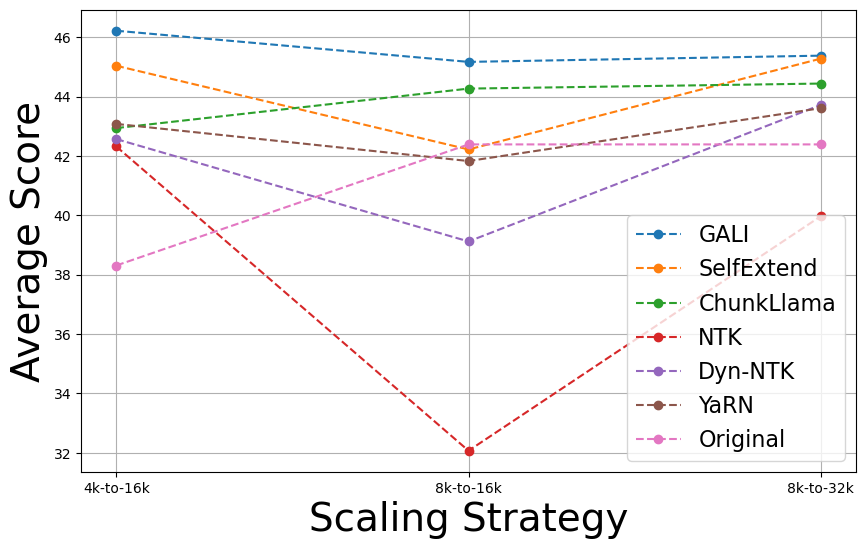

In [1]:
import matplotlib.pyplot as plt
# Data extracted from the "Average" column in the table for each method group
methods = ["Original", "SelfExtend", "ChunkLlama", "NTK", "Dyn-NTK", "YaRN", "GALI"]

# Corrected values based on the extracted table
llama_4k_to_16k = [38.31, 45.04, 42.94, 42.32, 42.57, 43.08, 46.22]
llama_8k_to_16k = [42.39, 42.22, 44.27, 32.07, 39.12, 41.83, 45.17]
llama_8k_to_32k = [42.39, 45.28, 44.44, 39.97, 43.72, 43.61, 45.38]


# X-axis labels
x_labels = ["4k-to-16k", "8k-to-16k", "8k-to-32k"]

# Create the plot
plt.figure(figsize=(10, 6))
for i in [6, 1,2,3,4,5,0]:
    method = methods[i]
    plt.plot(x_labels, [llama_4k_to_16k[i], llama_8k_to_16k[i], llama_8k_to_32k[i]], marker='o', linestyle='--', label=method)

# Formatting
plt.xlabel("Scaling Strategy",fontsize=28)
plt.ylabel("Average Score",fontsize=28)
# plt.title("Performance Comparison of Different Methods Across Scaling Strategies")
plt.legend(loc="lower right", fontsize=16)
plt.grid(True)

# Show the plot
plt.savefig(f'images/longbench_trend.png', transparent=True, dpi=300)
plt.show()

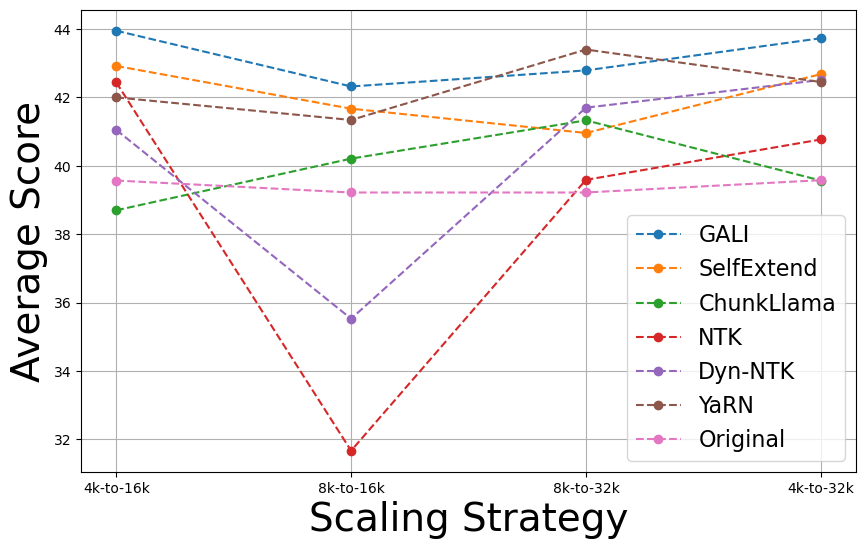

In [2]:
# Data extracted from the "Average" column in the table for each method group
methods = ["Original", "SelfExtend", "ChunkLlama", "NTK", "Dyn-NTK", "YaRN", "GALI"]

# Corrected values based on the extracted table
llama_4k_to_16k = [39.57, 42.92, 38.7, 42.44, 41.05, 42, 43.95]
llama_8k_to_16k = [39.22, 41.67, 40.21, 31.67, 35.53, 41.34, 42.32]
llama_8k_to_32k = [39.22, 40.96, 41.33, 39.59, 41.7, 43.4, 42.79]
llama_4k_to_32k = [39.58, 42.68, 39.57, 40.77, 42.51, 42.45, 43.73]


# X-axis labels
x_labels = ["4k-to-16k", "8k-to-16k", "8k-to-32k", "4k-to-32k"]

# Create the plot
plt.figure(figsize=(10, 6))
for i in [6, 1,2,3,4,5,0]:
    method = methods[i]
    plt.plot(x_labels, [llama_4k_to_16k[i], llama_8k_to_16k[i], llama_8k_to_32k[i], llama_4k_to_32k[i]], marker='o', linestyle='--', label=method)

# Formatting
plt.xlabel("Scaling Strategy",fontsize=28)
plt.ylabel("Average Score",fontsize=28)
# plt.title("Performance Comparison of Different Methods Across Scaling Strategies")
plt.legend(loc="lower right", fontsize=16)
plt.grid(True)

# Show the plot
plt.savefig(f'images/longeval_trend.png', transparent=True, dpi=300)
plt.show()

# other methods sample

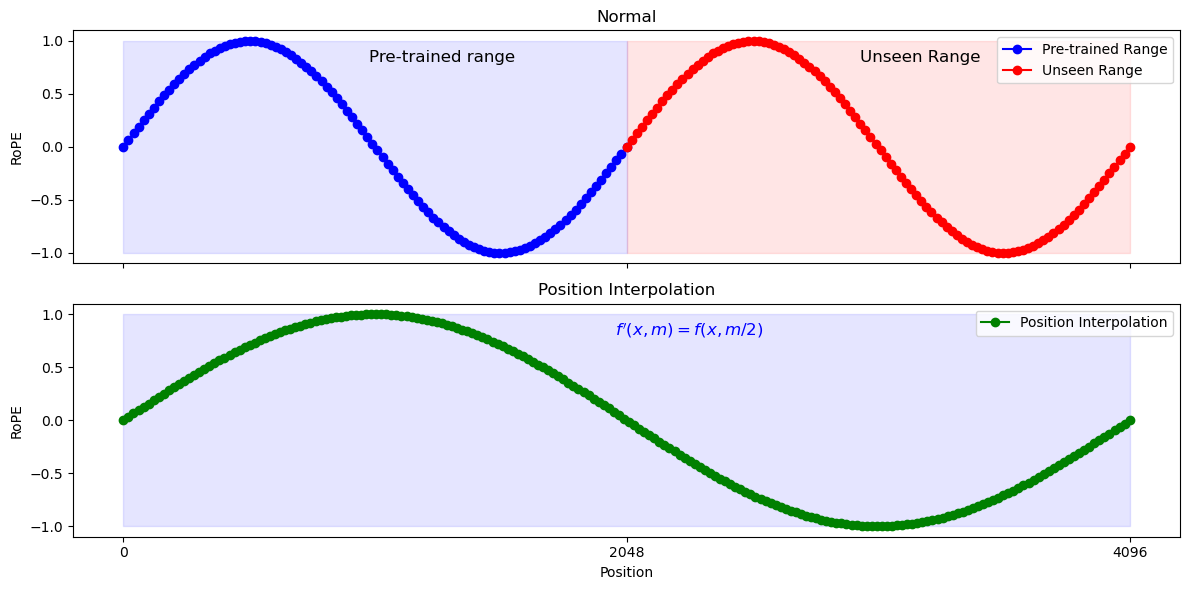

In [50]:
import numpy as np
import matplotlib.pyplot as plt

x_pretrained = np.linspace(0, 2048, 100)  # Pre-trained Range
x_unseen = np.linspace(2048, 4096, 100)   # Unseen Range
y_pretrained = np.sin(x_pretrained * np.pi / 1024) 
y_unseen = np.sin(x_unseen * np.pi / 1024)       

x_interpolated = np.linspace(0, 4096, 200)  # Position Interpolation
y_interpolated = np.sin(x_interpolated * np.pi / 2048) 

fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

ax[0].plot(x_pretrained, y_pretrained, 'o-', label='Pre-trained Range', color='blue')
ax[0].plot(x_unseen, y_unseen, 'o-', label='Unseen Range', color='red')
ax[0].fill_between(x_pretrained, -1, 1, color='blue', alpha=0.1)
ax[0].fill_between(x_unseen, -1, 1, color='red', alpha=0.1)
ax[0].set_title("Normal")
ax[0].set_ylabel("RoPE")
ax[0].legend(loc="upper right")

ax[1].plot(x_interpolated, y_interpolated, 'o-', label='Position Interpolation', color='green')
ax[1].fill_between(x_interpolated, -1, 1, color='blue', alpha=0.1)
ax[1].set_title("Position Interpolation")
ax[1].set_xlabel("Position")
ax[1].set_ylabel("RoPE")
ax[1].legend(loc="upper right")

ax[0].text(1000, 0.8, "Pre-trained range", fontsize=12)
ax[0].text(3000, 0.8, "Unseen Range", fontsize=12)
ax[1].text(2000, 0.8, r"$f'(x, m) = f(x, m/2)$", fontsize=12, color='blue')

plt.xticks([0, 2048, 4096], ["0", "2048", "4096"])
plt.tight_layout()
plt.show()

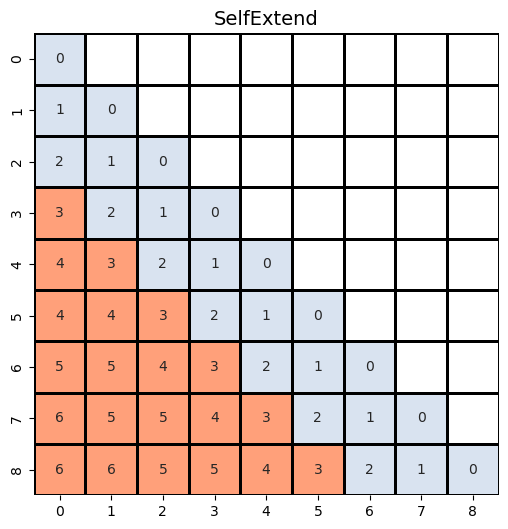

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_matrix(matrix):
    n = matrix.shape[0]
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    cmap = np.full(matrix.shape, np.nan)
    for i in range(n):
        for j in range(n):
            if i >= j:  
                cmap[i, j] = matrix[i, j]
    
    colors = ["#D9E3F0", "#FFA07A"] 
    sns.heatmap(matrix, annot=True, fmt="d", cmap=colors, mask=np.isnan(cmap), cbar=False,
                linewidths=1, linecolor="black", ax=ax)

    ax.set_title("SelfExtend", fontsize=14)

    ax.set_xticks(np.arange(n) + 0.5)
    ax.set_yticks(np.arange(n) + 0.5)
    ax.set_xticklabels(range(n))
    ax.set_yticklabels(range(n))

    # ax.invert_yaxis()
    
    plt.show()


matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [2, 1, 0, 0, 0, 0, 0, 0, 0],
    [3, 2, 1, 0, 0, 0, 0, 0, 0],
    [4, 3, 2, 1, 0, 0, 0, 0, 0],
    [4, 4, 3, 2, 1, 0, 0, 0, 0],
    [5, 5, 4, 3, 2, 1, 0, 0, 0],
    [6, 5, 5, 4, 3, 2, 1, 0, 0],
    [6, 6, 5, 5, 4, 3, 2, 1, 0],
])

plot_matrix(matrix)

# long term decay

In [1]:
import torch
from transformers import AutoTokenizer, LlamaTokenizer, LlamaForCausalLM, AutoModelForCausalLM, AutoConfig
from models.DPI.dpi_withoutflash import modify_method_of_instance, attn_analysis_attn_forward, attn_logits_analysis_attn_forward
model_name = "meta-llama/Meta-Llama-3-8B-Instruct"

config = AutoConfig.from_pretrained(model_name, token='')
config.return_dict_in_generate = True
config.output_attentions = True
config.num_hidden_layers = 1
tokenizer = AutoTokenizer.from_pretrained(model_name,padding_side='left',token='')
model = LlamaForCausalLM.from_pretrained(model_name, config = config, attn_implementation="eager", torch_dtype=torch.bfloat16, token='')
modifed_1 = modify_method_of_instance(model, "LlamaAttention", "forward", attn_logits_analysis_attn_forward)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Some weights of the model checkpoint at meta-llama/Meta-Llama-3-8B-Instruct were not used when initializing LlamaForCausalLM: ['model.layers.1.input_layernorm.weight', 'model.layers.1.mlp.down_proj.weight', 'model.layers.1.mlp.gate_proj.weight', 'model.layers.1.mlp.up_proj.weight', 'model.layers.1.post_attention_layernorm.weight', 'model.layers.1.self_attn.k_proj.weight', 'model.layers.1.self_attn.o_proj.weight', 'model.layers.1.self_attn.q_proj.weight', 'model.layers.1.self_attn.v_proj.weight', 'model.layers.10.input_layernorm.weight', 'model.layers.10.mlp.down_proj.weight', 'model.layers.10.mlp.gate_proj.weight', 'model.layers.10.mlp.up_proj.weight', 'model.layers.10.post_attention_layernorm.weight', 'model.layers.10.self_attn.k_proj.weight', 'model.layers.10.self_attn.o_proj.weight', 'model.layers.10.self_attn.q_proj.weight', 'model.layers.10.self_attn.v_proj.weight', 'model.layers.11.input_layernorm.weight', 'model.layers.11.mlp.down_proj.weight', 'model.layers.11.mlp.gate_proj.wei

In [2]:
from tqdm import tqdm
text = "The quick brown fox jumps over the lazy dog."
model.eval()
attn_logits_list = []
with torch.no_grad():
    for step in tqdm(range(1,819, 1)):
        inputs = tokenizer(text, return_tensors="pt")
        # print(inputs.keys())
        position_ids = inputs['input_ids'].new_tensor(range(0, inputs['input_ids'].size(1)*step,step)).unsqueeze(0)
        # print(position_ids)
        
        model_output = model(**inputs, position_ids=position_ids)
        # print(model_output.keys())
        attn_logits_list.append(model_output['attentions'])

100%|██████████| 818/818 [28:50<00:00,  2.12s/it]


In [3]:
torch.save(attn_logits_list, 'analysis/attn_logits_analysis_list.pt')

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def draw_attention_long_term_deday(source_token_idx, target_token_idx, attn_logits_list,step=1):
    pair_attn_logits = []
    intervals = []
    for i, attn_logits in enumerate(attn_logits_list):
        # print(attn_logits[0][0][source_token_idx][target_token_idx])
        logit = attn_logits[0][0][source_token_idx][target_token_idx].item()
        pair_attn_logits.append(logit)
        if target_token_idx == 0:
            distance = len(attn_logits[0][0][source_token_idx]) - 1
        else:
            distance = source_token_idx - target_token_idx
        intervals.append(distance*(i+1)*step)
    print(intervals[-1])
    plt.figure(figsize=(10, 6))
    plt.plot(intervals, pair_attn_logits, linestyle='-', linewidth=2, markersize=8)

    # plt.title(f"Attention Logits for a Specific Pair {source_token_idx} to {target_token_idx}", fontsize=16)
    plt.xlabel("Interval", fontsize=40)
    plt.ylabel("Attention Logit", fontsize=40)
    # plt.ylim(0, 0.3)

    # plt.grid(alpha=0.5)
    plt.xticks(fontsize=18, rotation=45)
    plt.yticks(fontsize=18)

    plt.legend([f"Token {source_token_idx} to token {target_token_idx}"], loc='upper right', fontsize=40)
    plt.tight_layout()
    plt.savefig(f'images/attention_logits_{source_token_idx}_{target_token_idx}.png')
    plt.show()

8180


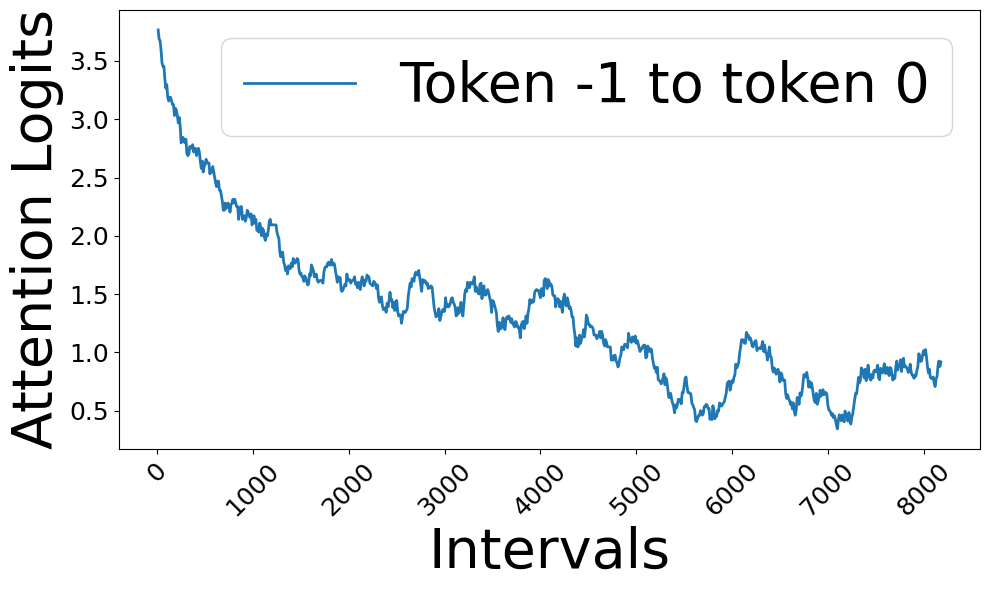

In [139]:
source_token_idx = -1
target_token_idx = 0
attn_logits_analysis_list = torch.load('analysis/attn_logits_analysis_list.pt')
draw_attention_long_term_deday(source_token_idx, target_token_idx, attn_logits_analysis_list,step=1)



818


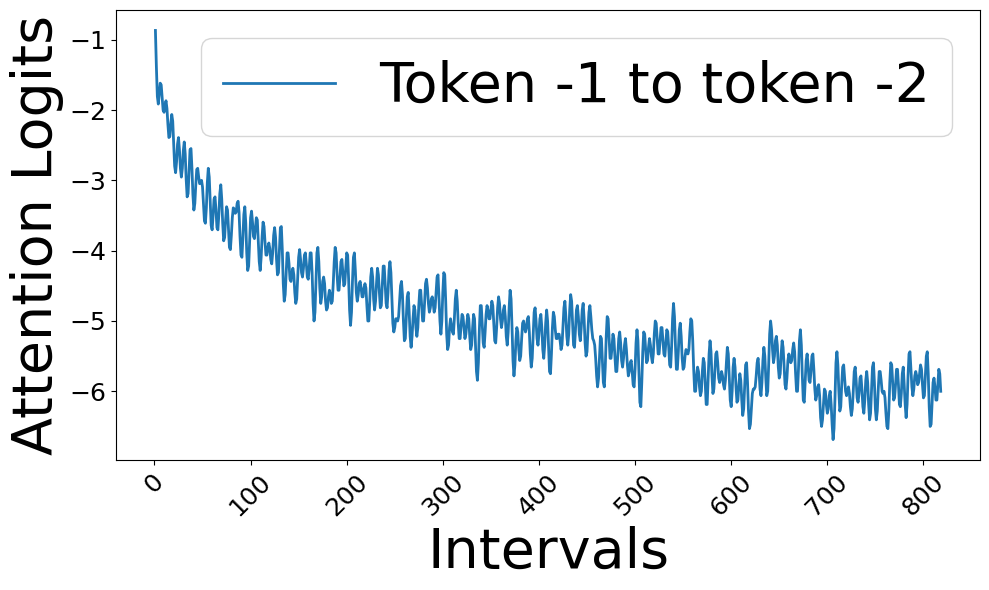

In [140]:
source_token_idx = -1
target_token_idx = -2
attn_logits_analysis_list = torch.load('analysis/attn_logits_analysis_list.pt')
draw_attention_long_term_deday(source_token_idx, target_token_idx, attn_logits_analysis_list,step=1)

# hyperparameters

In [467]:
# Chunkllama hyperparameters
pretraining_length = 2048
chunk_size = pretraining_length * 3 // 4
local_window = pretraining_length // 16
print(chunk_size, local_window)

1536 128


# Data tokenization  statistics

In [226]:
from datasets import load_dataset
from transformers import AutoTokenizer
from tqdm import tqdm
from pred import build_chat_lbench, wrap_with_model_special_input, build_chat_leval
import json
import os


device = "cpu"
data_name_tmp = "{}"
lb_datasets = ["narrativeqa", "qasper", "multifieldqa_en", "hotpotqa", "2wikimqa", "musique", \
                    "gov_report", "qmsum", "multi_news", "trec", "triviaqa", "samsum", \
                    "passage_count", "passage_retrieval_en", "lcc", "repobench-p"]


dataset2prompt = json.load(open("longbench/config/dataset2prompt.json", "r"))
dataset2maxlen = json.load(open("longbench/config/dataset2maxlen.json", "r"))
# model_name = "meta-llama/Meta-Llama-3-8B-Instruct"  #  "meta-llama/Llama-2-7b-chat-hf"
# save_name = "analysis/llama-3-8b_token_length.json" #  "analysis/llama-2-7b_token_length.json"
model_name = "meta-llama/Llama-2-7b-chat-hf"  #  "meta-llama/Llama-2-7b-chat-hf"
save_name = "analysis/llama-2-7b_token_length.json" #  "analysis/llama-2-7b_token_length.json"
tokenizer = AutoTokenizer.from_pretrained(model_name,padding_side='left',token='')
length_statistics = {}
for dataset in lb_datasets:
    length_statistics[dataset] = []
    data = load_dataset('THUDM/LongBench', data_name_tmp.format(dataset), split='test')
    prompt_format = dataset2prompt[dataset]
    max_gen = dataset2maxlen[dataset]


    for json_obj in tqdm(data):
        prompt = prompt_format.format(**json_obj)
        # truncate to fit max_length (we suggest truncate in the middle, since the left and right side may contain crucial instructions)
        tokenized_prompt = tokenizer(prompt, truncation=False, return_tensors="pt").input_ids[0]
        if dataset not in ["trec", "triviaqa", "samsum", "lsht", "lcc", "repobench-p"]: # chat models are better off without build prompts on these tasks
            prompt = build_chat_lbench(tokenizer, prompt, model_name)
        if "chatglm3" in model_name:
            if dataset in ["trec", "triviaqa", "samsum", "lsht", "lcc", "repobench-p"]:
                input = wrap_with_model_special_input(model_name, prompt, tokenizer, device)
            else:
                input = prompt
        else:
            input = wrap_with_model_special_input(model_name, prompt, tokenizer, device, dataset)
        context_length = input.input_ids.shape[-1]
        length_statistics[dataset].append(context_length)


def read_jsonl(train_fn):
    res = []
    with open(train_fn) as f:
        for i, line in enumerate(f):
            try:
                res.append(json.loads(line))
            except:
                continue
    print(f"loading from {train_fn}, there are {len(res)} samples")
    return res


datasets_closed_ended = ["coursera", "quality", "topic_retrieval_longchat", "tpo", "gsm100", "codeU", "sci_fi"]
metric = 'exam_eval'
files = [os.path.join("leval/LEval-data/Closed-ended-tasks", f"{task_name}.jsonl") for task_name in datasets_closed_ended]
for file_path in files:
    data = read_jsonl(file_path)
    path, tail = os.path.split(file_path)
    dataset = tail.split('.')[0]
    length_statistics[dataset] = []
    for d in tqdm(data):
        document = d['input']             


        instructions = d['instructions']
        outputs = d['outputs']


        for inst, out in zip(instructions, outputs):
            save_d = {}
            save_d['query'] = inst
            save_d['gt'] = out
            sys_prompt, message = build_chat_leval(metric, inst, document, file_path, model_name)
            save_d['prompt'] = message.replace(document, "<long document>")
            text_inputs = message


            inputs = wrap_with_model_special_input(model_name, message, tokenizer, device, dataset, sys_prompt = sys_prompt)
            context_length = inputs.input_ids.size()[-1]
            length_statistics[dataset].append(context_length)


with open(save_name, 'w') as f:
    json.dump(length_statistics, f)

100%|██████████| 500/500 [00:16<00:00, 30.11it/s]


loading from leval/LEval-data/Closed-ended-tasks/coursera.jsonl, there are 15 samples


100%|██████████| 15/15 [00:02<00:00,  5.41it/s]


loading from leval/LEval-data/Closed-ended-tasks/quality.jsonl, there are 15 samples


100%|██████████| 15/15 [00:02<00:00,  6.96it/s]


loading from leval/LEval-data/Closed-ended-tasks/topic_retrieval_longchat.jsonl, there are 50 samples


100%|██████████| 50/50 [00:03<00:00, 14.21it/s]


loading from leval/LEval-data/Closed-ended-tasks/tpo.jsonl, there are 15 samples


100%|██████████| 15/15 [00:01<00:00,  7.97it/s]


loading from leval/LEval-data/Closed-ended-tasks/gsm100.jsonl, there are 100 samples


100%|██████████| 100/100 [00:00<00:00, 141.08it/s]


loading from leval/LEval-data/Closed-ended-tasks/codeU.jsonl, there are 90 samples


100%|██████████| 90/90 [00:04<00:00, 21.33it/s]


loading from leval/LEval-data/Closed-ended-tasks/sci_fi.jsonl, there are 7 samples


100%|██████████| 7/7 [00:01<00:00,  4.05it/s]


In [299]:
with open("analysis/llama-3-8b_token_length.json", 'r') as f:
    data = json.load(f)
for i in data['2wikimqa']:
    if i > 16328:
        print(i)

16413


In [63]:
import matplotlib.pyplot as plt
import json
import numpy as np
order1 = ["NarrativeQA", "Qasper", "MultiField-en", "HotpotQA", "2WikiMQA", "Musique", "GovReport", "QMSum", "MultiNews", "TREC", "TriviaQA", "SAMSum", "PassageCount", "PassageRe", "Lcc", "RepoBench-P"]
order2 = ["Coursera", "GSM", "QuALITY", "TOFEL", "SFiction", "CodeU"]



mapd = {
    "NarrativeQA": "narrativeqa", "Qasper": "qasper", "MultiField-en": "multifieldqa_en", "HotpotQA": "hotpotqa", "2WikiMQA": "2wikimqa", "Musique": "musique", "GovReport": "gov_report", "QMSum": "qmsum", "MultiNews": "multi_news", "TREC": "trec", "TriviaQA": "triviaqa", "SAMSum": "samsum", "PassageCount": "passage_count", "PassageRe": "passage_retrieval_en", "Lcc": "lcc", "RepoBench-P": "repobench-p", "Coursera": "coursera", "GSM": "gsm100", "QuALITY": "quality", "TOFEL":"tpo","SFiction": "sci_fi", "CodeU": "codeU"
}


def plot_length_dist(data, order1, order2, mapd, tokenizer_name, ticks, hlines):
    labels = order1 + order2
    values = [data[mapd[label]] for label in labels]

    means = [np.mean(group) for group in values]

    norm = plt.Normalize(min(means), max(means)) 
    cmap = plt.cm.viridis 
    colors = [cmap(1-norm(mean)) for mean in means]  

    plt.figure(figsize=(20, 12))
    box = plt.boxplot(values, labels=labels, patch_artist=True, showmeans=True, meanline=True)

    # plt.title(f"Length Distribution with {tokenizer_name}", fontsize=14)
    plt.xlabel("Datasets", fontsize=16)
    plt.ylabel("Length", fontsize=16)
    plt.yticks(ticks,fontsize=14) 
    plt.xticks(rotation=45)


    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color) 
        patch.set_edgecolor('black') 
        patch.set_linewidth(1.5) 
        
    for median in box['medians']:
        median.set_color('red') 
        median.set_linewidth(2) 

    for mean in box['means']:
        mean.set_color('orange') 
        mean.set_linewidth(2)  


    # plt.grid(axis="y", linestyle="--", alpha=0.7, linewidth=0.5)
    for yv in hlines:
        plt.axhline(y=yv, color="black", linestyle="--", linewidth=2, alpha=0.4)
    plt.savefig(f"images/{tokenizer_name}_length_distribution.png", dpi=300)
    plt.show()

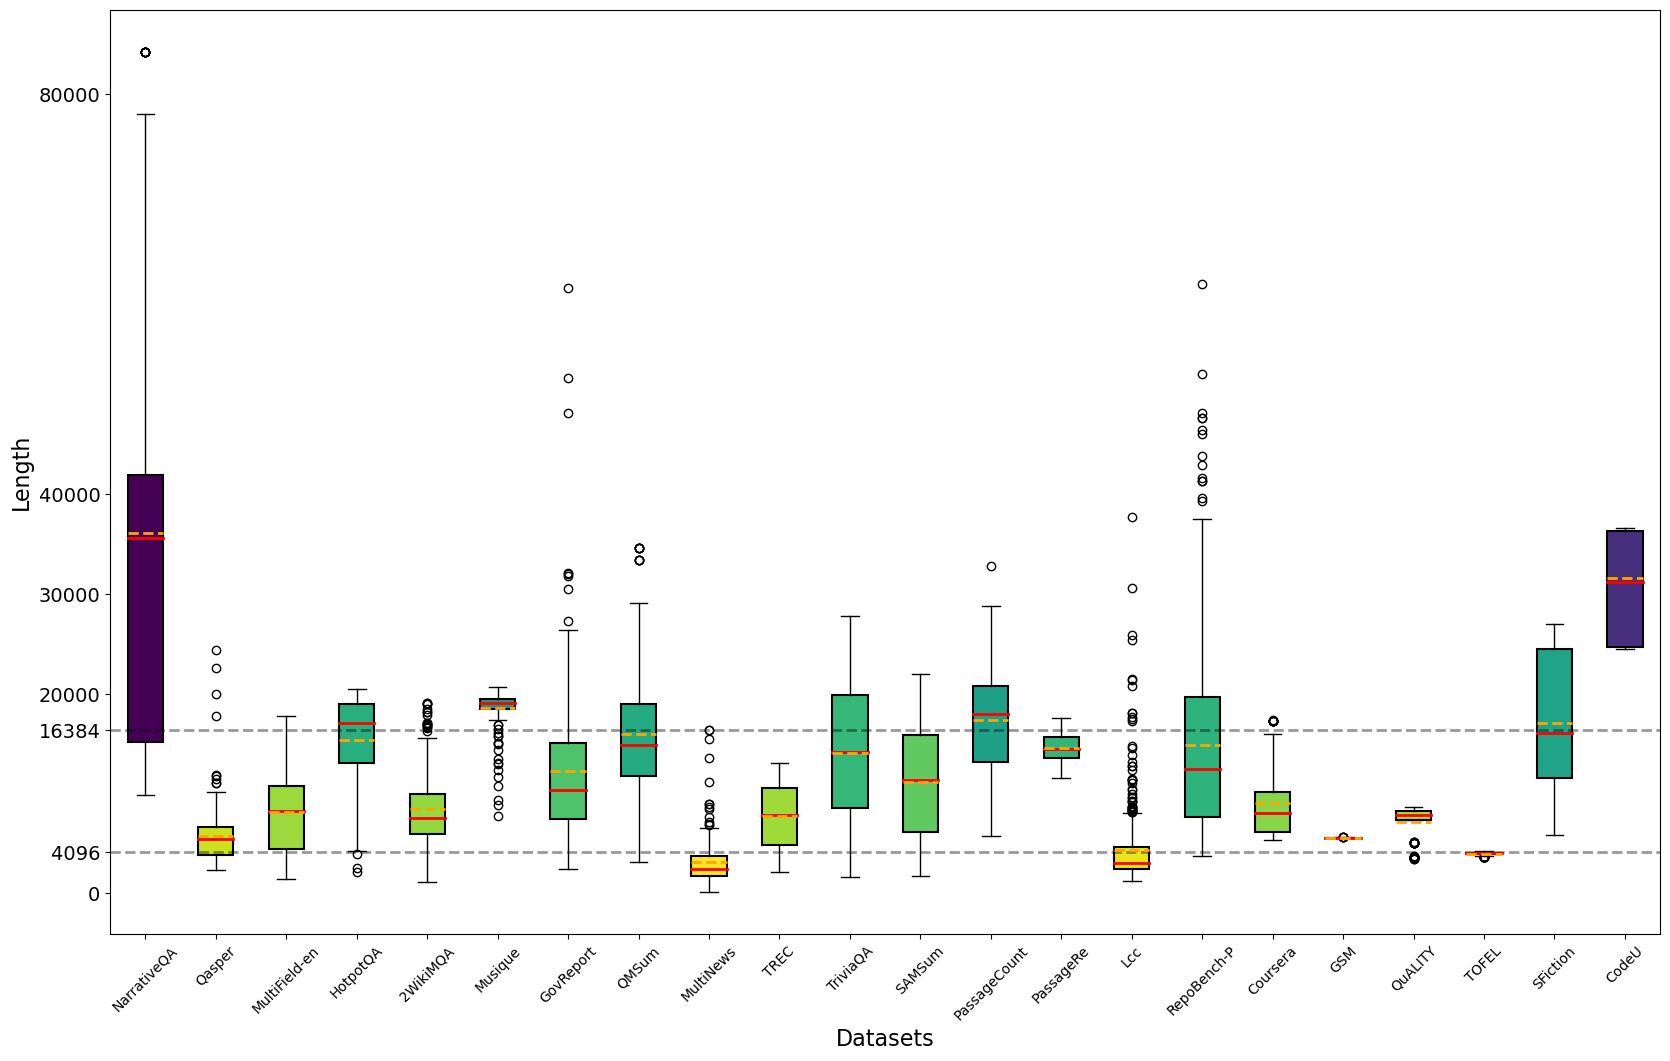

In [64]:
with open("analysis/llama-2-7b_token_length.json", 'r') as f:
    data = json.load(f)


plot_length_dist(data, order1, order2, mapd, "Llama2", [0, 4096, 16384, 20000, 30000, 40000, 80000], [4096, 16384])

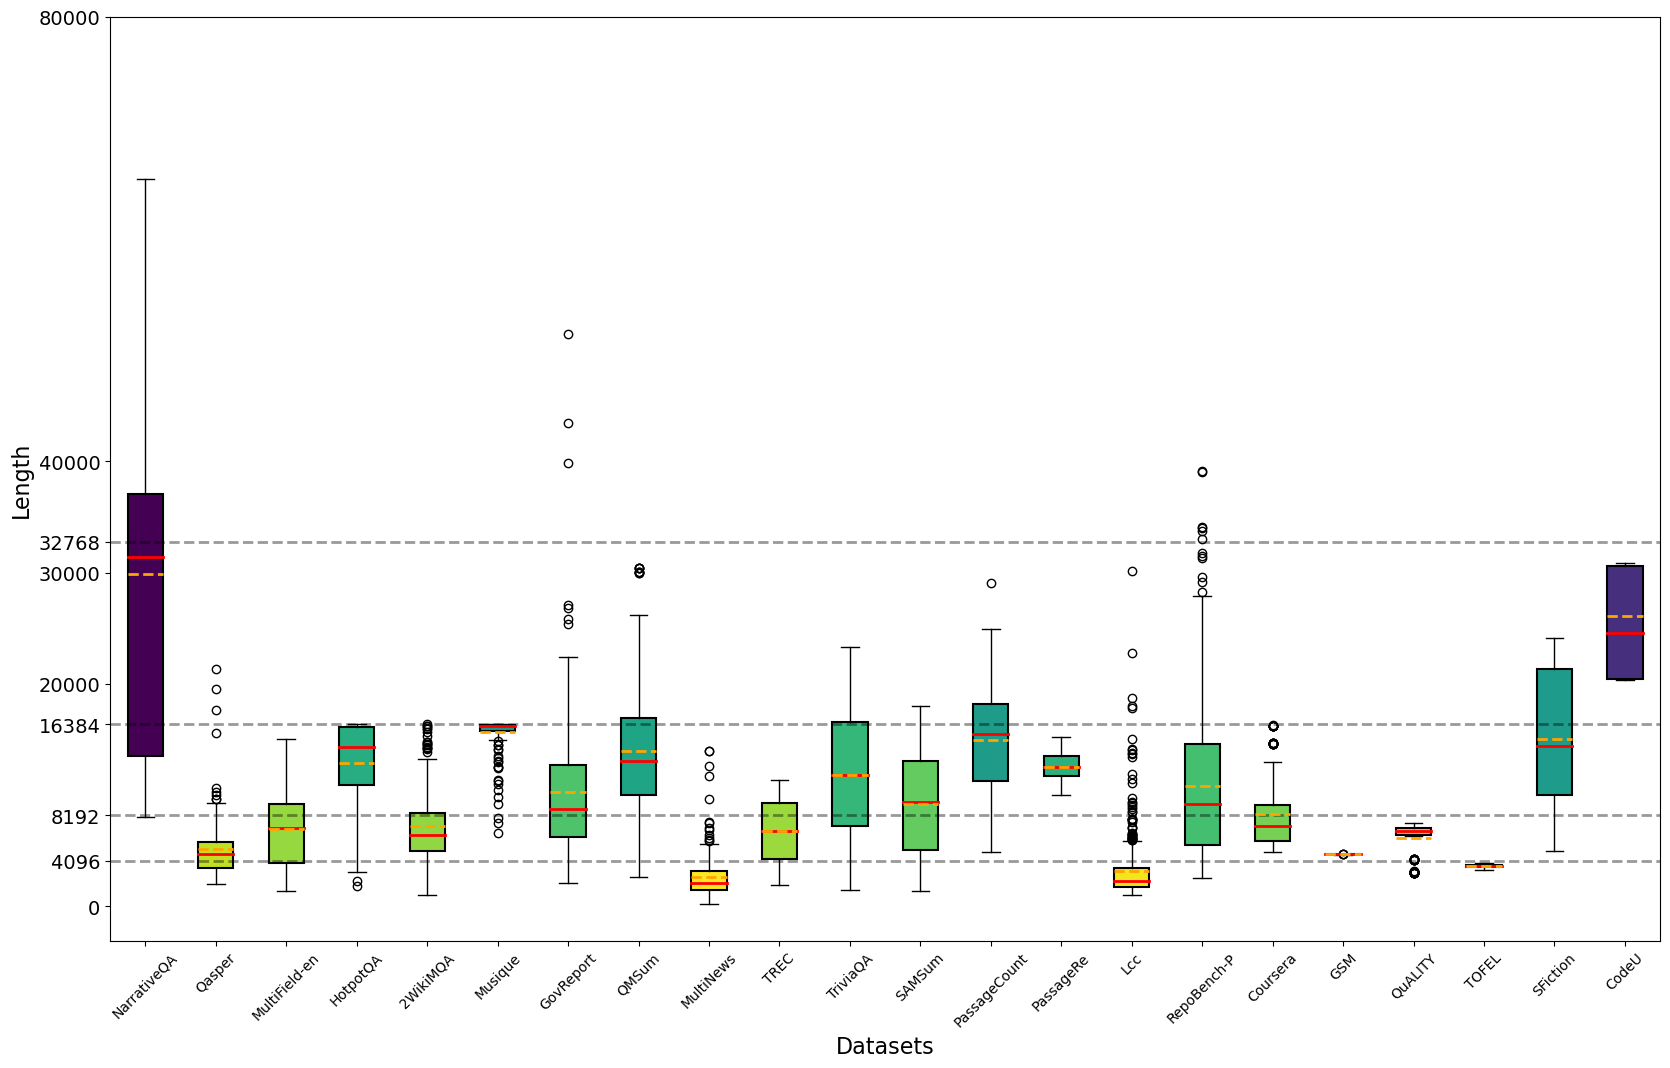

In [65]:
with open("analysis/llama-3-8b_token_length.json", 'r') as f:
    data = json.load(f)


plot_length_dist(data, order1, order2, mapd, "Llama3", [0, 4096, 8192, 16384, 20000, 30000, 32768, 40000, 80000], [4096, 8192, 16384, 32768])

# Ablation

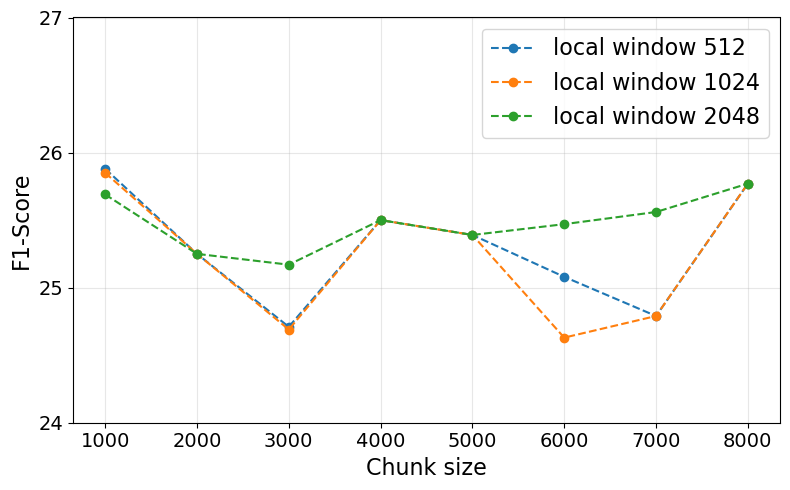

In [67]:
# Reimport necessary libraries due to environment reset
import matplotlib.pyplot as plt


data = {
    2048: [25.69, 25.25, 25.17, 25.50, 25.39, 25.47, 25.56, 25.77],  # 2048
    1024: [25.85, 25.25, 24.69, 25.50, 25.39, 24.63, 24.79, 25.77],  # 1024
    512: [25.88, 25.25, 24.71, 25.50, 25.39, 25.08, 24.79, 25.77],   # 512 (with noise)
}

# Data
chunk_size = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]


colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
x_indices = range(len(chunk_size))
# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_indices, data[512], marker='o', linestyle='--', color=colors[0], label='local window 512')
plt.plot(x_indices, data[1024], marker='o', linestyle='--', color=colors[1], label='local window 1024')
plt.plot(x_indices, data[2048], marker='o', linestyle='--', color=colors[2], label='local window 2048')


# Add labels and title
# plt.title('Local Window and Group Size Influence', fontsize=16)
plt.xlabel('Chunk size', fontsize=16)
plt.ylabel('F1-Score', fontsize=16)
plt.xticks(x_indices, chunk_size, fontsize=14)
plt.yticks([24, 25, 26, 27], fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=16)


# Show plot
plt.tight_layout()
plt.savefig('./images/local_window_group_size.png', dpi=300)
plt.show()

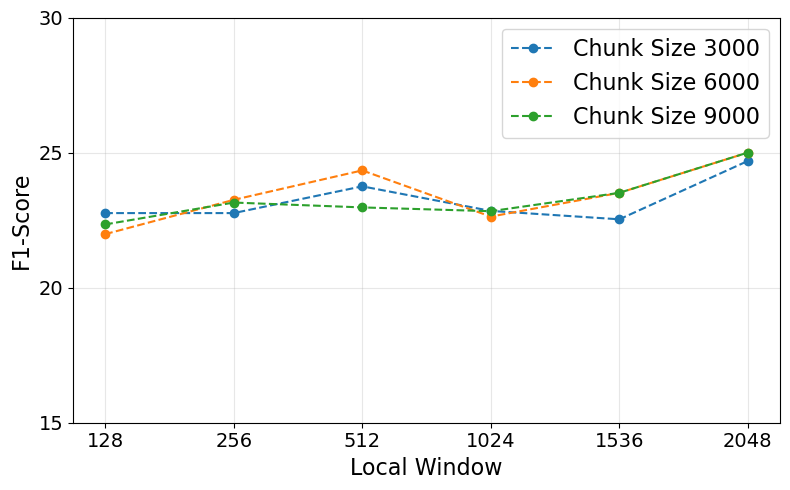

In [68]:
# Reimport necessary libraries due to environment reset
import matplotlib.pyplot as plt


# Data
local_window = [128, 256, 512, 1024, 1536, 2048]
f1_score_1 = [22.76, 22.76, 23.75, 22.84, 22.53, 24.69] # 3000
f1_score_2 = [21.98, 23.25, 24.34, 22.63, 23.51, 25] # 6000
f1_score_3 = [22.34, 23.15, 22.97, 22.83, 23.51, 25] # 9000


colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
x_indices = range(len(local_window))
# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_indices, f1_score_1, marker='o', linestyle='--', color=colors[0], label='Chunk Size 3000')
plt.plot(x_indices, f1_score_2, marker='o', linestyle='--', color=colors[1], label='Chunk Size 6000')
plt.plot(x_indices, f1_score_3, marker='o', linestyle='--', color=colors[2], label='Chunk Size 9000')


# Add labels and title
# plt.title('Local Window Influence', fontsize=16)
plt.xlabel('Local Window', fontsize=16)
plt.ylabel('F1-Score', fontsize=16)
plt.xticks(x_indices, local_window, fontsize=14)
plt.yticks([15, 20, 25, 30], fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=16)


# Show plot
plt.tight_layout()
plt.show()

# attention analysis demo

In [75]:
import torch
import os
import torch.nn.functional as F
def merge_attns(attns, num_hidden_layers=32):
    new_attns = []
    max_k_len = attns[-1][0].shape[-1] # bs, q, k
    for attn_idx, attn in enumerate(attns[:-1]):
        # print("attn ",attn[0].shape)
        last_k_len = attn[0].shape[-1]
        pad_klen = max_k_len - last_k_len
        new_attns.append(F.pad(attn[0],(0,pad_klen),"constant",0))
        # print("attns[attn_idx] ",new_attns[attn_idx].shape)
    # new_attns.append(attns[-1][0])
    complete_attn = torch.cat(new_attns, dim=-2)
    # print("complete_attn ",complete_attn.shape)
    return complete_attn/num_hidden_layers

In [76]:
ori8k = torch.load("analysis/attn2/llama38b-repro_original-8k-0-1818.0-attns.pt",map_location=torch.device('cpu'))
prefill_length = 8091
# prefill_length = 4096
print(len(ori8k), ori8k[0][0].shape)
ori8k = merge_attns(ori8k)[0].to(torch.bfloat16)
methods_list = ["repro_original", "repro_se", "repro_yarn", "repro_ntk", "repro_dynamic_ntk"]
ori_max_position_embeddings_list = [4096, 2048, 1024, 512]
ori_mpe_to_abv = {4096:"4k", 2048:"2k", 1024:"1k", 512:"5h"}
abv_to_ori_mpe = {"4k":4096, "2k":2048, "1k":1024, "5h":512}
abv_to_check_pe = {"4k":prefill_length, "2k":prefill_length, "1k":prefill_length, "5h":prefill_length}
attn_dir = "analysis/attn2"
all_difs = {}
for root, dirs, files in os.walk(attn_dir):
    for file in files:
        if "original" in file:
            continue
        method = file.split("-8k-")[0].split("-")[1]
        used_ori_pe = file.split("-8k-")[0].split("-")[0][-2:]
        used_ori_pe_num = abv_to_ori_mpe[used_ori_pe]
        file_path = os.path.join(root, file)
        attns = torch.load(file_path,map_location=torch.device('cpu'))
        completed_attn = merge_attns(attns)[0].to(torch.bfloat16)
        key = f"{method}, {used_ori_pe}"
        current_result = (ori8k[:prefill_length,:prefill_length] - completed_attn[:prefill_length,:prefill_length]).abs().sum()
        if method == "dpi":
            last_result = all_difs.get(key, (float('inf'),""))[0]
            if last_result > current_result:
                all_difs[key] = (current_result, file_path)
        elif method == "repro_se":
            last_result = all_difs.get(key, (float('-inf'),""))[0]
            if last_result < current_result:
                all_difs[key] = (current_result, file_path)
        else:
            all_difs[f"{method}, {used_ori_pe}"] = (current_result, file_path)


all_difs = {key: all_difs[key] for key in sorted(all_difs)}

10 torch.Size([1, 8091, 8091])


In [471]:

for k,v in all_difs.items():


    print(k, v[0], v[1])

dpi, 1k tensor(2352., dtype=torch.bfloat16) analysis/attn2/llama38b1k-dpi-8k-0-1818.0-512_1000-attns.pt
dpi, 2k tensor(448., dtype=torch.bfloat16) analysis/attn2/llama38b2k-dpi-8k-0-5000.0-1536_100-attns.pt
dpi, 4k tensor(117., dtype=torch.bfloat16) analysis/attn2/llama38b4k-dpi-8k-0-1538.0-2048_100-attns.pt
dpi, 5h tensor(3488., dtype=torch.bfloat16) analysis/attn2/llama38b5h-dpi-8k-0-3636.0-128_1000-attns.pt
repro_dynamic_ntk, 1k tensor(2208., dtype=torch.bfloat16) analysis/attn2/llama38b1k-repro_dynamic_ntk-8k-0-3333.0-attns.pt
repro_dynamic_ntk, 2k tensor(1480., dtype=torch.bfloat16) analysis/attn2/llama38b2k-repro_dynamic_ntk-8k-0-1818.0-attns.pt
repro_dynamic_ntk, 4k tensor(736., dtype=torch.bfloat16) analysis/attn2/llama38b4k-repro_dynamic_ntk-8k-0-3333.0-attns.pt
repro_dynamic_ntk, 5h tensor(2944., dtype=torch.bfloat16) analysis/attn2/llama38b5h-repro_dynamic_ntk-8k-0-1818.0-attns.pt
repro_ntk, 1k tensor(1248., dtype=torch.bfloat16) analysis/attn2/llama38b1k-repro_ntk-8k-0-1818

## bar chart

In [94]:
def title_map(key):
    titles_map = {"repro_se":"SE", "repro_yarn":"YaRN", "repro_ntk":"NTK", "repro_dynamic_ntk":"Dyn-NTK", "dpi":"GALI"}
    for k,v in titles_map.items():
        if k in key:
            return v

In [133]:
def visualize_attention_differences(all_difs, standard_attn, used_pes, title="Attention Matrix Differences Across PEs"):
    """
    Visualize the differences between attention score matrices and the standard matrix
    for multiple positional encodings (PEs) using a grouped bar chart.


    Parameters:
    - all_difs: dict, a dictionary with method names as keys and paths to attention matrices as values.
    - standard_attn: torch.Tensor, the standard attention matrix.
    - used_pes: list of str, a list of positional encodings to compare.
    - title: str, title of the visualization.
    """
    import matplotlib.pyplot as plt
    import numpy as np


    standard_attn = standard_attn.to(torch.float32)


    # Prepare data
    methods = []
    all_differences = {pe: [] for pe in used_pes}


    for pe in used_pes:
        used_difs = {k: v for k, v in all_difs.items() if pe in k}
        compare_len = abv_to_check_pe[pe]


        for k, v in used_difs.items():
            attention_matrix = merge_attns(torch.load(v[1], map_location=torch.device('cpu')))[0].to(torch.float32)
            diff = (standard_attn[:compare_len, :compare_len] - attention_matrix[:compare_len, :compare_len]).abs().sum().item()


            if title_map(k) not in methods:
                # print(k)
                methods.append(title_map(k))  # Ensure unique method names


            all_differences[pe].append(diff)


    # Convert data to NumPy arrays for plotting
    num_methods = len(methods)
    num_pes = len(used_pes)
    bar_width = 0.2  # Width of each bar
    x = np.arange(num_methods)  # X positions for methods


    # Plot grouped bar chart
    print(num_methods)
    print(all_differences)
    plt.figure(figsize=(9, 7))
    for i, pe in enumerate(used_pes):
        plt.bar(
            x + i * bar_width,
            all_differences[pe],
            bar_width,
            label=f"{pe}",
            alpha=0.8
        )


    # Add labels and title
    # plt.title(title, fontsize=16)
    plt.xlabel("Methods", fontsize=20)
    plt.ylabel("Sum of Differences", fontsize=20)
    plt.xticks(x + bar_width * (num_pes - 1) / 2, methods, ha='center', fontsize=14)
    # plt.legend(title="Used Position Intervals", fontsize=12)
    plt.legend(fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)


    # Adjust layout and save
    plt.tight_layout()
    plt.savefig(f'images/attn_differences_grouped.png', dpi=300, transparent=True)
    plt.show()

5
{'2k': [447.9989013671875, 1477.325439453125, 900.0169677734375, 869.35546875, 1261.8419189453125], '4k': [117.17422485351562, 736.0792236328125, 529.691650390625, 218.37408447265625, 728.0911865234375]}


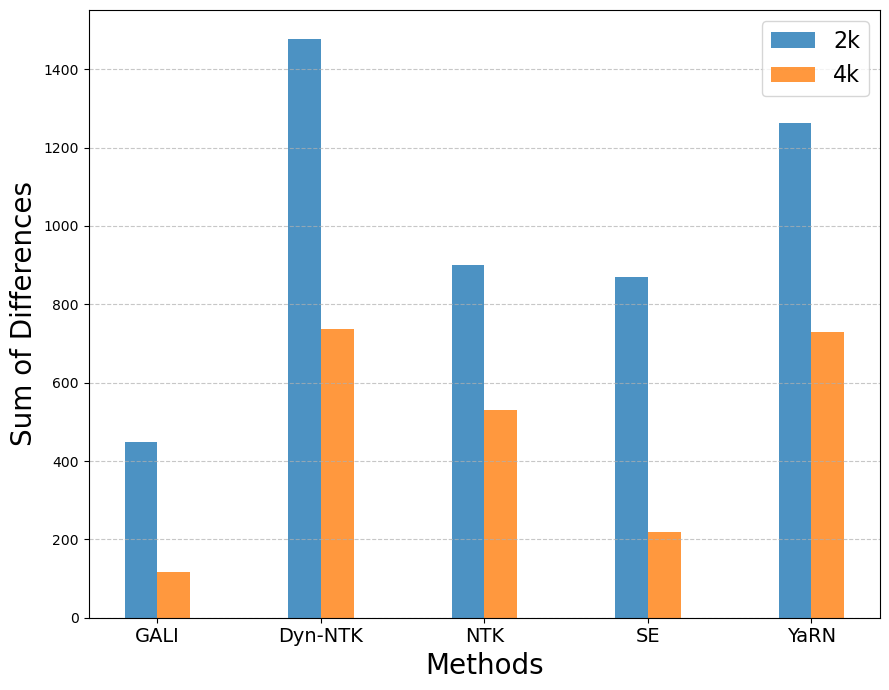

In [134]:
visualize_attention_differences(all_difs, ori8k, ["2k","4k"], title="Attention Score Matrix Comparison")

## heatmap

In [415]:
def title_map(key):
    titles_map = {"repro_se":"SE", "repro_yarn":"YaRN", "repro_ntk":"NTK", "repro_dynamic_ntk":"Dyn. NTK", "dpi":"GALI"}
    for k,v in titles_map.items():
        if k in key:
            return v

In [99]:
import torch
import torch.nn.functional as F


def custom_average_pooling(matrix, scale_factor):
    if len(matrix.shape) == 2:
        matrix = matrix.unsqueeze(0).unsqueeze(0)  # (H, W) -> (N=1, C=1, H, W)
    elif len(matrix.shape) == 3:
        matrix = matrix.unsqueeze(0)  # (C, H, W) -> (N=1, C, H, W)
    
    _, _, h, w = matrix.shape
    
    target_h = int(h * scale_factor)
    target_w = int(w * scale_factor)
    
    pooled_matrix = F.adaptive_avg_pool2d(matrix, (target_h, target_w))
    
    if pooled_matrix.shape[0] == 1 and pooled_matrix.shape[1] == 1:
        pooled_matrix = pooled_matrix.squeeze(0).squeeze(0)
    
    return pooled_matrix

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import zoom


def visualize_attention_matrix(all_difs, standard_attn, used_pe="5h", title="Attention Matrix", cmap='plasma',zoomratio=1.):
    """
    Visualize an attention score matrix using a heatmap.


    Parameters:
    - attention_matrix: 2D numpy array or list of lists, the attention score matrix.
    - xlabel: str, label for the x-axis.
    - ylabel: str, label for the y-axis.
    - xticklabels: list of str, labels for the x-axis ticks.
    - yticklabels: list of str, labels for the y-axis ticks.
    - title: str, title of the heatmap.
    - cmap: str, colormap for the heatmap (default: 'viridis').
    """
    used_difs = {k:v for k,v in all_difs.items() if used_pe in k}
    standard_attn = standard_attn.to(torch.float32)
    attention_matrices = [standard_attn] + [merge_attns(torch.load(v[1],map_location=torch.device('cpu')))[0].to(torch.float32) for k,v in used_difs.items()]
    titles = ["Original"] + [title_map(k) for k,v in used_difs.items()]
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()  # Flatten the 2D grid for easy iteration
    for i, ax in enumerate(axes):
        attention_matrix = attention_matrices[i]
        # print("attention_matrix ",attention_matrix.shape, standard_attn)
        compare_len = abv_to_check_pe[used_pe]


        attention_matrix = np.array(attention_matrix)  # Ensure it's a numpy array
        # attention_matrix = (attention_matrix - np.min(attention_matrix)) / (np.max(attention_matrix) - np.min(attention_matrix))


        # attention_matrix = np.log1p(attention_matrix - np.min(attention_matrix))
        # attention_matrix = attention_matrix / np.max(attention_matrix, axis=1, keepdims=True)


        # show_attention_matrix = zoom(attention_matrix.astype(np.float32), zoom=zoomratio)  # 缩小到 1%
        show_attention_matrix = custom_average_pooling(torch.tensor(attention_matrix), zoomratio)
        # attention_matrix = np.log1p(attention_matrix)
        # standard_attn_idx = 2 if i <=2 else 5
        # standard_attn = attention_matrices[standard_attn_idx][0].to(torch.float16)
        im = ax.imshow(show_attention_matrix, cmap=cmap, aspect='auto', vmin=0, vmax=0.001)
        ax.set_title(f"{titles[i]}: {(standard_attn[:compare_len,:compare_len] - attention_matrix[:compare_len,:compare_len]).abs().sum():.2f}" if titles else f"Matrix {i+1}")
        # ax.set_title(f"{titles[i]}: {(standard_attn[-compare_len:,-compare_len:] - attention_matrix[-compare_len:,-compare_len:]).abs().sum()}" if titles else f"Matrix {i+1}")
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Add a colorbar for each subplot


    plt.tight_layout()
    plt.show()

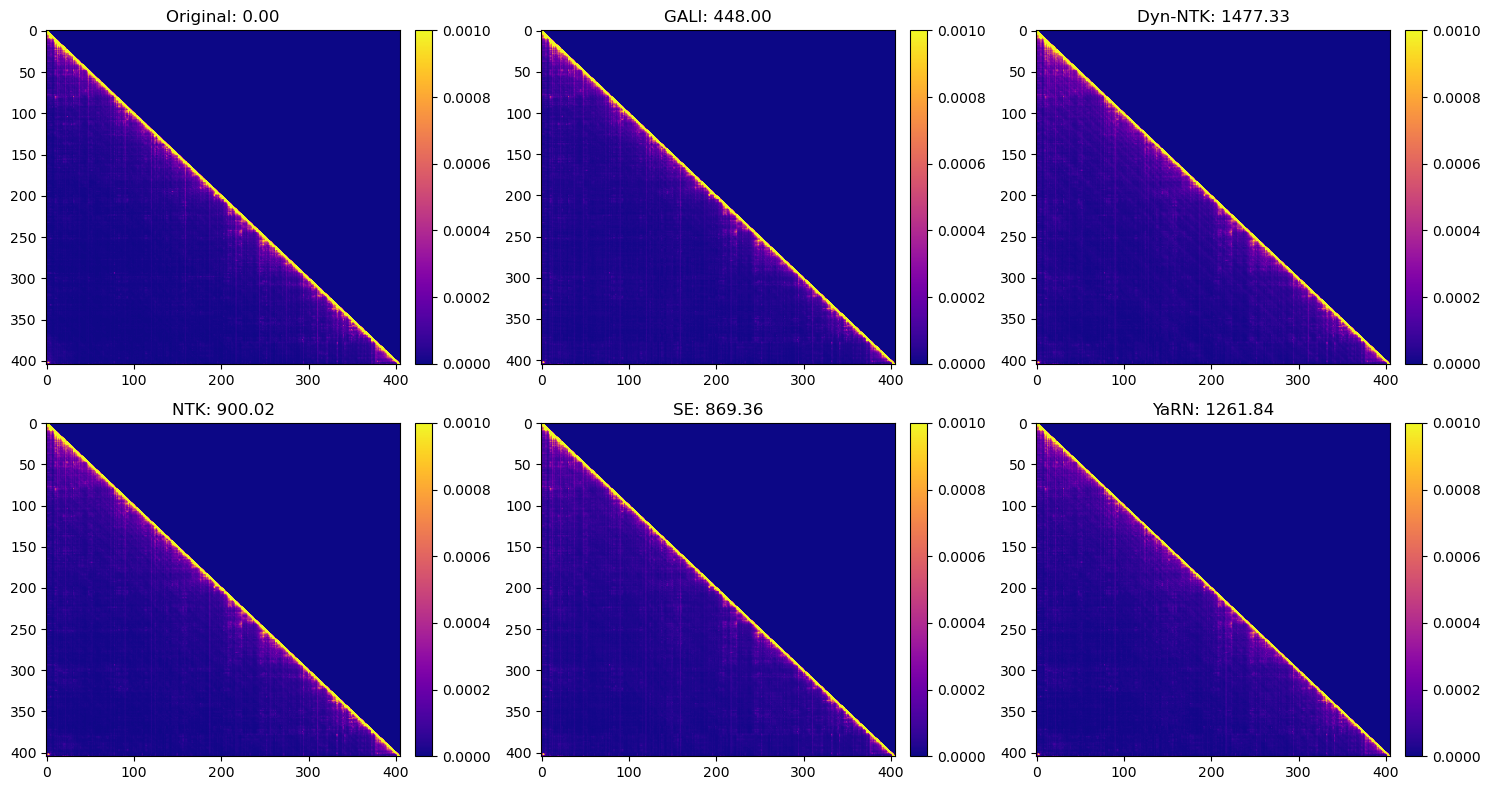

In [100]:
visualize_attention_matrix(all_difs, ori8k, used_pe="2k", title="Attention Matrix", cmap='plasma',zoomratio=0.05)

In [101]:
def visualize_attention_matrix(all_difs, standard_attn, used_pe="5h", title="Attention Matrix", cmap='plasma', zoomratio=1.):
    """
    Visualize an attention score matrix using a heatmap with a shared color bar.


    Parameters:
    - all_difs: dict, a dictionary of attention differences with file paths.
    - standard_attn: torch.Tensor, the standard attention matrix.
    - used_pe: str, positional encoding used to filter diffs.
    - title: str, title of the visualization.
    - cmap: str, colormap for the heatmap (default: 'plasma').
    - zoomratio: float, zoom ratio for resizing the attention matrices.
    """
    used_difs = {k: v for k, v in all_difs.items() if used_pe in k}
    standard_attn = standard_attn.to(torch.float32)
    attention_matrices = [standard_attn] + [merge_attns(torch.load(v[1], map_location=torch.device('cpu')))[0].to(torch.float32) for k, v in used_difs.items()]
    titles = ["Original"] + [title_map(k) for k,v in used_difs.items()]


    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()  # Flatten the 2D grid for easy iteration


    # Find global min and max for the color bar
    # vmin = min(np.min(attention_matrix) for attention_matrix in attention_matrices)
    # vmax = max(np.max(attention_matrix) for attention_matrix in attention_matrices)


    for i, ax in enumerate(axes):
        if i >= len(attention_matrices):  # Handle cases where there are more axes than matrices
            ax.axis('off')
            continue


        attention_matrix = np.array(attention_matrices[i])  # Ensure it's a numpy array
        compare_len = abv_to_check_pe[used_pe]


        # Resize attention matrix for better visualization
        # show_attention_matrix = zoom(attention_matrix.astype(np.float32), zoom=zoomratio)
        show_attention_matrix = custom_average_pooling(torch.tensor(attention_matrix), zoomratio)


        # Plot the heatmap
        im = ax.imshow(show_attention_matrix, cmap=cmap, aspect='auto', vmin=0, vmax=0.0005)
        ax.set_title(f"{titles[i]}: {(standard_attn[:compare_len, :compare_len] - attention_matrix[:compare_len, :compare_len]).abs().sum():.2f}" if titles else f"Matrix {i+1}")


    # Add a single color bar shared across all subplots
    cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.025, pad=0.05)
    cbar.set_label("Attention Score", rotation=0)
#  orientation='horizontal'
    # Add a main title
    # fig.suptitle(title, fontsize=16)


    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0])
    # plt.tight_layout()
    plt.savefig(f'images/attn_{used_pe}.png', transparent=True, dpi=300)
    plt.show()

/var/folders/lv/v1lnm4v91fs06mmw2fxz6py40000gn/T/ipykernel_46905/2859462999.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0])
/var/folders/lv/v1lnm4v91fs06mmw2fxz6py40000gn/T/ipykernel_46905/2859462999.py:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0])


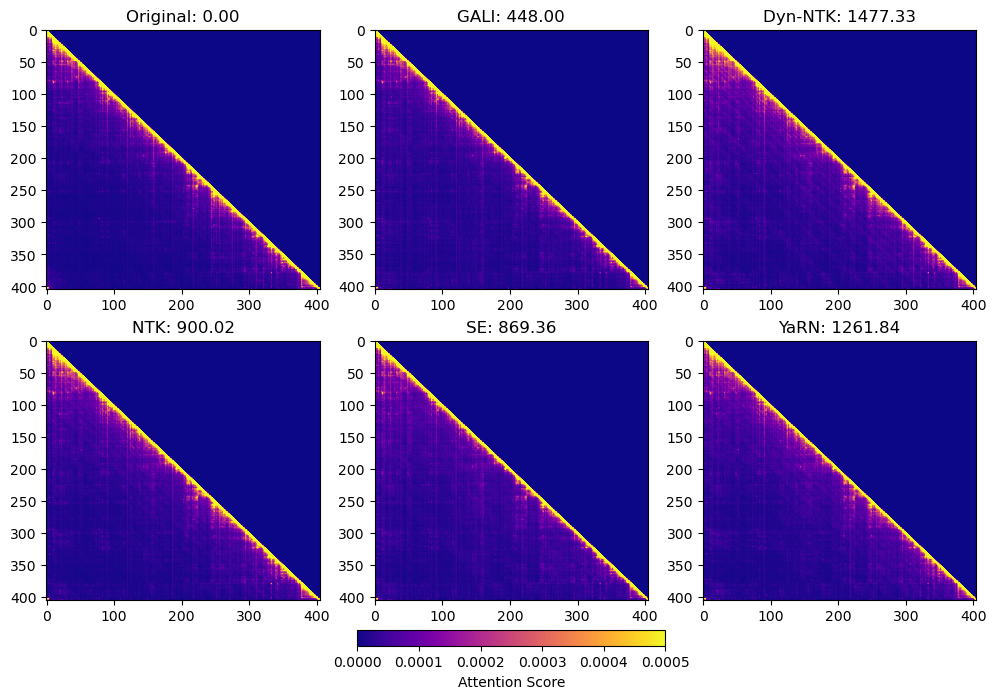

In [102]:
visualize_attention_matrix(all_difs, ori8k, used_pe="2k", title="Attention Matrix", cmap='plasma',zoomratio=0.05)

/var/folders/lv/v1lnm4v91fs06mmw2fxz6py40000gn/T/ipykernel_46905/2859462999.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0])
/var/folders/lv/v1lnm4v91fs06mmw2fxz6py40000gn/T/ipykernel_46905/2859462999.py:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0])


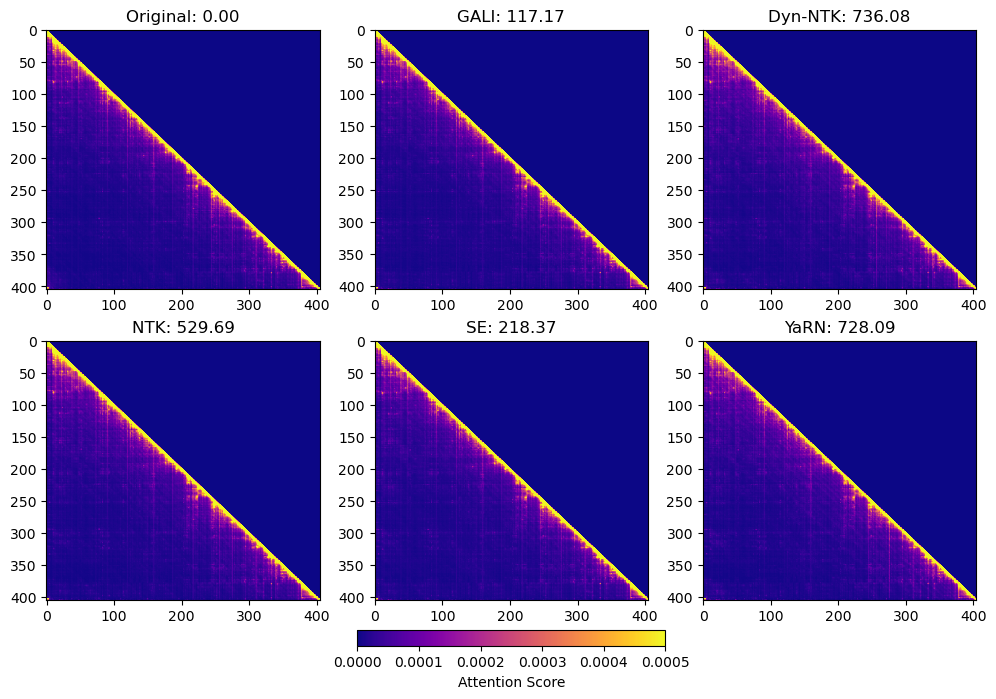

In [103]:
visualize_attention_matrix(all_difs, ori8k, used_pe="4k", title="Attention Matrix", cmap='plasma',zoomratio=0.05)

## attention hitmap in one row

In [421]:
def visualize_attention_matrix2(all_difs, standard_attn, used_pe="5h", title="Attention Matrix", cmap='plasma', zoomratio=1.):
    """
    Visualize attention score matrices using a heatmap with a shared color bar, excluding the original attention map.


    Parameters:
    - all_difs: dict, a dictionary of attention differences with file paths.
    - standard_attn: torch.Tensor, the standard attention matrix.
    - used_pe: str, positional encoding used to filter diffs.
    - title: str, title of the visualization.
    - cmap: str, colormap for the heatmap (default: 'plasma').
    - zoomratio: float, zoom ratio for resizing the attention matrices.
    """
    # Filter differences and load attention matrices
    standard_attn = standard_attn.to(torch.float32)
    used_difs = {k: v for k, v in all_difs.items() if used_pe in k}
    attention_matrices = [
        merge_attns(torch.load(v[1], map_location=torch.device('cpu')))[0].to(torch.float32)
        for k, v in used_difs.items()
    ]
    titles = [title_map(k) for k in used_difs.keys()]


    # Create subplots with a single row
    num_matrices = len(attention_matrices)
    fig, axes = plt.subplots(1, num_matrices, figsize=(5 * num_matrices, 4))  # Adjust width dynamically
    if num_matrices == 1:
        axes = [axes]  # Ensure axes is iterable for a single subplot


    compare_len = abv_to_check_pe[used_pe]


    # Plot each attention matrix
    for i, ax in enumerate(axes):
        attention_matrix = np.array(attention_matrices[i])  # Ensure it's a numpy array
        # Resize attention matrix for visualization
        show_attention_matrix = zoom(attention_matrix.astype(np.float32), zoom=zoomratio)


        # Plot heatmap
        im = ax.imshow(show_attention_matrix, cmap=cmap, aspect='auto', vmin=0, vmax=0.001)
        diff_score = (standard_attn[:compare_len, :compare_len] - attention_matrix[:compare_len, :compare_len]).abs().sum()
        ax.set_title(f"{titles[i]}: {diff_score:.2f}")


    # Add a single shared color bar
    cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.025, pad=0.1)
    cbar.set_label("Attention Score")


    # Add a main title
    # fig.suptitle(title, fontsize=16)


    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0])
    plt.savefig(f'images/attn_1row_{used_pe}.png', transparent=True, dpi=300)
    plt.show()

/var/folders/lv/v1lnm4v91fs06mmw2fxz6py40000gn/T/ipykernel_17973/1371148878.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0])
/var/folders/lv/v1lnm4v91fs06mmw2fxz6py40000gn/T/ipykernel_17973/1371148878.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0])


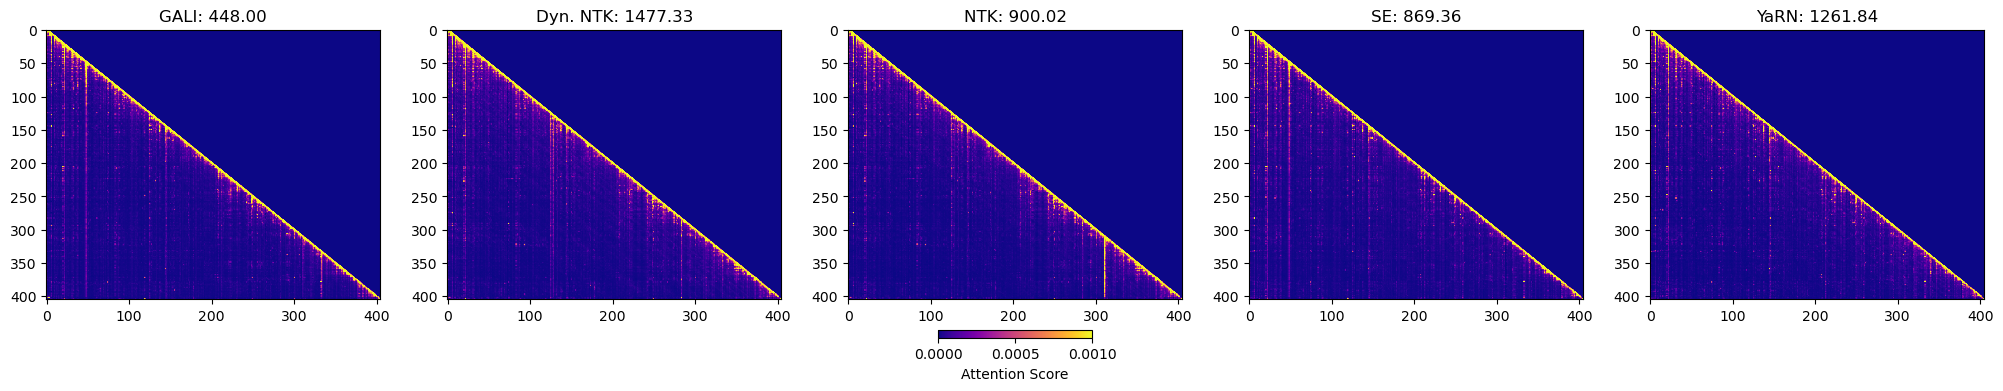

In [422]:
visualize_attention_matrix2(all_difs, ori8k, used_pe="2k", title="Attention Matrix", cmap='plasma',zoomratio=0.05)

/var/folders/lv/v1lnm4v91fs06mmw2fxz6py40000gn/T/ipykernel_17973/1371148878.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0])
/var/folders/lv/v1lnm4v91fs06mmw2fxz6py40000gn/T/ipykernel_17973/1371148878.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0])


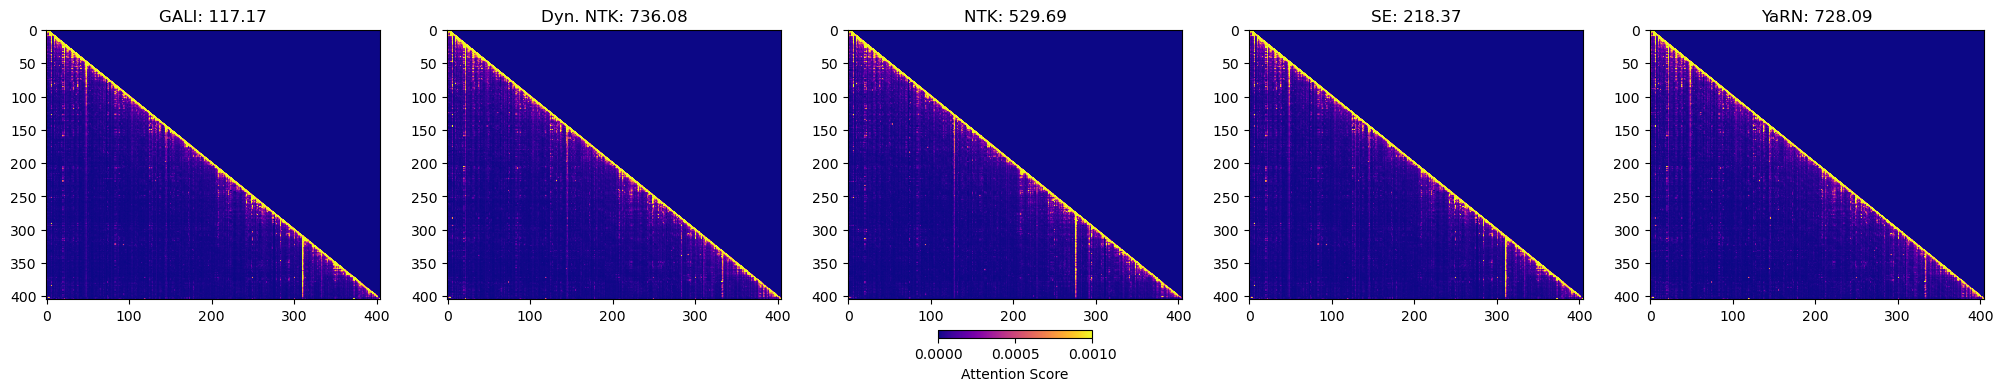

In [423]:
visualize_attention_matrix2(all_difs, ori8k, used_pe="4k", title="Attention Matrix", cmap='plasma',zoomratio=0.05)

## box line plot

In [104]:
def remove_outliers(row):
    Q1 = np.percentile(row, 1)
    Q3 = np.percentile(row, 90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return row[(row >= lower_bound) & (row <= upper_bound)]
import seaborn as sns
def plot_attention_boxplots(
    all_difs, standard_attn,
    row_indices,
    used_pe="5h",
):
    """
    Represent specific rows of attention scores from multiple combinations as Box Plots.


    Parameters:
    - all_difs: dict, a dictionary of attention differences with file paths.
    - standard_attn: torch.Tensor, the standard attention matrix.
    - row_indices: list of int, the row indices to visualize.
    - used_pe: str, positional encoding used to filter diffs.


    Returns:
    - None (plots the boxplots).
    """
    import matplotlib.pyplot as plt
    import numpy as np


    # Filter and process attention matrices
    used_difs = {k: v for k, v in all_difs.items() if used_pe in k}
    standard_attn = standard_attn.to(torch.float32)
    attention_combinations = [[standard_attn] + [merge_attns(torch.load(v[1], map_location=torch.device('cpu')))[0].to(torch.float32) for k, v in used_difs.items()]]
    titles = ["Original"] + [title_map(k) for k,v in used_difs.items()]
    # legend_titles = ["standard"] + [k for k, v in used_difs.items()]


    # Configure subplots
    num_rows = len(row_indices)
    fig, axes = plt.subplots(num_rows, 1, figsize=(10, num_rows * 6), sharex=True)
    if num_rows == 1:
        axes = [axes]  # Ensure axes is always iterable for single-row case


    # Default colors if not provided
    # if colors is None:
    # colors = plt.cm.tab10.colors  # Use tab10 colormap as default


    colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#34568B"]
    # colors = sns.color_palette("muted", n_colors=len(titles))
    median_color = "#FF4500"
    for r_idx, row_index in enumerate(row_indices):
        fig, ax = plt.subplots(figsize=(10, 6))
        rows = [np.array(matrix[row_index, :row_index]) for matrix in attention_combinations[0]]


        # Normalize rows to avoid scale issues
        normalized_rows = [remove_outliers(row / np.sum(row)) if np.sum(row) > 0 else np.zeros_like(row) for row in rows]


        # Plot boxplot
        box = ax.boxplot(normalized_rows, labels=titles, vert=True, patch_artist=True, showfliers=False)


        # Set custom colors for each box
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)


        for median in box['medians']:
            median.set_color(median_color)
            median.set_linewidth(2)


        # Compute dynamic ylim
        data_min = min(np.min(row) for row in normalized_rows)
        data_max = max(np.max(row) for row in normalized_rows)
        ylim_min = data_min - 0.1 * (data_max - data_min)
        ylim_max = data_max*0.3 + 0.1 * (data_max - data_min)


        # Apply ylim
        plt.ylim(ylim_min, ylim_max)


        # ax.set_title(f"Row {row_index} - Box Plot Comparison")
        ax.set_xlabel("Methods")
        ax.set_ylabel("Attention Scores")
        ax.grid(True)


        fig.savefig(f"images/box_{used_pe}_{row_index}.png", bbox_inches="tight", dpi=300)
        plt.close(fig)
    # Adjust layout
    # plt.tight_layout()
    # plt.show()

In [ ]:
# plot_attention_boxplots(all_difs, standard_attn=ori8k, row_indices=[1000,2000,3000,4000, 5000,6000, 7000, 8000], used_pe="2k")
plot_attention_boxplots(all_difs, standard_attn=ori8k, row_indices=[1000,2000,3000,4000, 5000,6000, 7000, 8000], used_pe="2k")

In [ ]:
plot_attention_boxplots(all_difs, standard_attn=ori8k, row_indices=[1000,2000,3000,4000, 5000,6000, 7000, 8000], used_pe="4k")

## statistics diff

In [81]:
from scipy.stats import entropy
import pandas as pd
def attention_dif_df(
    all_difs, standard_attn,
    row_indices,
    used_pe="5h", 
):
    """
    Represent specific rows of attention scores from multiple combinations as PDFs.


    Parameters:
    - attention_combinations: list of lists of 2D numpy arrays, each sublist is a combination of attention matrices.
    - row_indices: list of int, the row indices to visualize for each combination.
    - bandwidths: list of lists of float or None, the bandwidth for KDE for each combination and row index.
    - num_points: int, the number of points to evaluate the PDF (default: 100).
    - titles: list of str, titles for each combination's subplot (optional).


    Returns:
    - None (plots the PDFs).
    """
    
    used_difs = {k:v for k,v in all_difs.items() if used_pe in k}
    standard_attn = standard_attn.to(torch.float32)
    attention_matrcies = [standard_attn] + [merge_attns(torch.load(v[1],map_location=torch.device('cpu')))[0].to(torch.float32) for k,v in used_difs.items()]
    titles = ["Original"] + [title_map(k) for k,v in used_difs.items()]


    # for combination in attention_combinations:
    #     for matrix in combination:
    #         print(matrix.shape)


    # Configure subplots
    num_rows = len(row_indices)
    data = []
    for row_index in row_indices:
        for matrix_idx, matrix in enumerate(attention_matrcies):
            row = np.array(matrix[row_index, :row_index])
            row = row / np.sum(row) if np.sum(row) > 0 else np.zeros_like(row)
            max_val = np.max(row)
            min_val = np.min(row)
            mean_val = np.mean(row)
            variance = np.var(row)
            median_val = np.median(row)
            row_entropy = entropy(row)
            data.append({"Method":titles[matrix_idx], "row":row_index, "min":min_val, "max":max_val, "mean":mean_val, "var":variance, "med":median_val, "ent":row_entropy})
            
    df = pd.DataFrame(data)
    return df

In [82]:
df = attention_dif_df(all_difs, standard_attn=ori8k, row_indices=[1000,2000,3000,4000, 5000,6000, 7000, 8000], used_pe="2k")
df.to_csv("images/df_2k.csv", index=False)

In [83]:
df = attention_dif_df(all_difs, standard_attn=ori8k, row_indices=[1000,2000,3000,4000, 5000,6000, 7000, 8000], used_pe="4k")
df.to_csv("images/df_4k.csv", index=False)

## statistics diff in one row，line chart   

In [129]:
def plot_abs_ent_difference_vs_row(all_difs, standard_attn, used_pe="5h",interval=1):


    used_difs = {k:v for k,v in all_difs.items() if used_pe in k}
    standard_attn = standard_attn.to(torch.float32)
    attention_matrcies = [standard_attn] + [merge_attns(torch.load(v[1],map_location=torch.device('cpu')))[0].to(torch.float32) for k,v in used_difs.items()]
    titles = ["Original"] + [title_map(k) for k,v in used_difs.items()]
    
    compare_len = abv_to_check_pe[used_pe]
    # for combination in attention_combinations:
    #     for matrix in combination:
    #         print(matrix.shape)


    # Configure subplots
    data = []
    for row_index in range(0, compare_len, interval):
        for matrix_idx, matrix in enumerate(attention_matrcies):
            row = np.array(matrix[row_index, :row_index])
            row = row / np.sum(row) if np.sum(row) > 0 else np.zeros_like(row)
            # max_val = np.max(row)
            # min_val = np.min(row)
            # mean_val = np.mean(row)
            # variance = np.var(row)
            # median_val = np.median(row)
            row_entropy = entropy(row)
            data.append({"Method":titles[matrix_idx], "row":row_index, "ent":row_entropy})
    
    data = pd.DataFrame(data)
    # Extract the 'Original' ent values for each row
    original_ent = data[data['Method'] == 'Original'][['row', 'ent']].set_index('row')


    plt.figure(figsize=(9, 7))


    methods = data['Method'].unique()
    for method in methods:
        if method == 'Original':
            continue
        # Calculate the absolute difference from 'Original'
        method_data = data[data['Method'] == method][['row', 'ent']].set_index('row')
        abs_diff = (method_data['ent'] - original_ent['ent']).abs()
        plt.plot(abs_diff.index, abs_diff.values, label=method, marker='o', alpha=0.7)
    
    plt.xticks(fontsize=14)

    plt.yticks(fontsize=14)
    # plt.title('Entropy Comparison', fontsize=16)
    plt.xlabel('Row', fontsize=20)
    plt.ylabel('Absolute Entropy Difference', fontsize=20)
    # plt.legend(title='Method', fontsize=12)
    plt.legend(fontsize=16)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'images/attn_row_ent_{used_pe}_{interval}.png', transparent=True, dpi=300)
    plt.show()
    


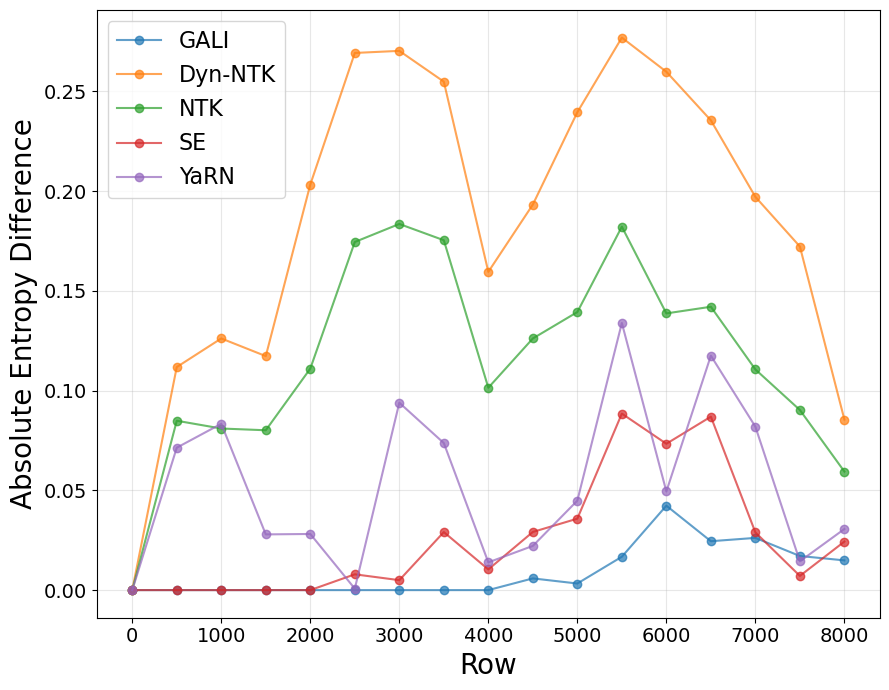

In [130]:
plot_abs_ent_difference_vs_row(all_difs, standard_attn=ori8k, used_pe="4k", interval = 500)

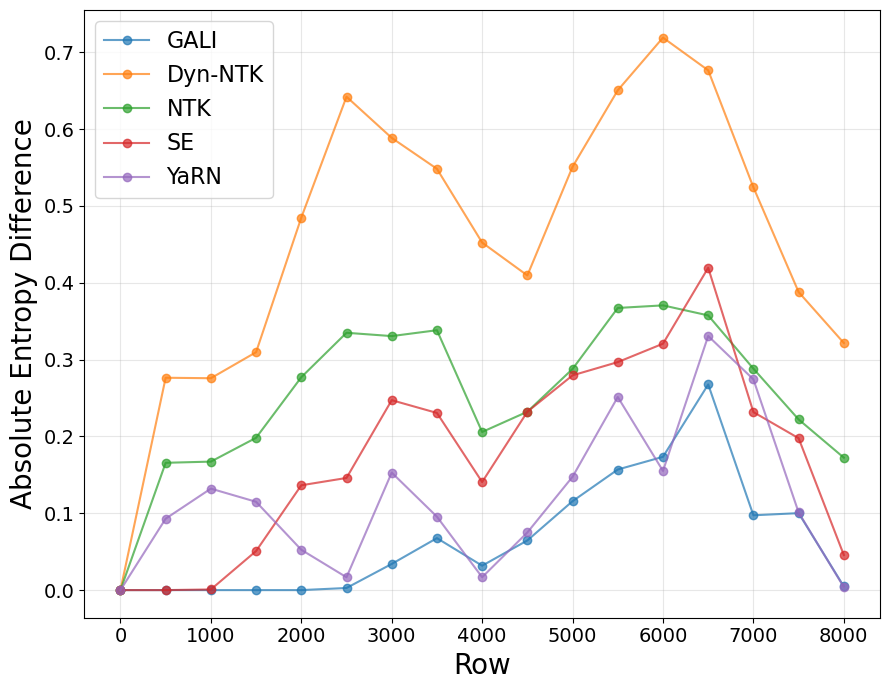

In [131]:
# Call the function to plot the absolute differences
plot_abs_ent_difference_vs_row(all_difs, standard_attn=ori8k, used_pe="2k", interval = 500)

## gaussian_kde PDF

In [87]:
from scipy.stats import gaussian_kde, entropy,wasserstein_distance


def plot_attention_pdfs(
    all_difs, standard_attn,
    row_indices,
    bandwidths,
    num_points=100,
    used_pe="5h", 
):
    """
    Represent specific rows of attention scores from multiple combinations as PDFs.


    Parameters:
    - attention_combinations: list of lists of 2D numpy arrays, each sublist is a combination of attention matrices.
    - row_indices: list of int, the row indices to visualize for each combination.
    - bandwidths: list of lists of float or None, the bandwidth for KDE for each combination and row index.
    - num_points: int, the number of points to evaluate the PDF (default: 100).
    - titles: list of str, titles for each combination's subplot (optional).


    Returns:
    - None (plots the PDFs).
    """
    
    num_combinations = 1
    used_difs = {k:v for k,v in all_difs.items() if used_pe in k}
    standard_attn = standard_attn.to(torch.float32)
    attention_combinations = [[standard_attn] + [merge_attns(torch.load(v[1],map_location=torch.device('cpu')))[0].to(torch.float32) for k,v in used_difs.items()]]
    legend_tiels = ["standard"] + [k for k,v in used_difs.items()]


    # for combination in attention_combinations:
    #     for matrix in combination:
    #         print(matrix.shape)


    # Configure subplots
    num_rows = len(row_indices)
    fig, axes = plt.subplots(num_rows, num_combinations, figsize=(10*1, num_rows * 8), sharex=True)


    axes = axes.flatten()
    if num_rows == 1:
        axes = [axes]  # Ensure axes is always iterable for single-row case


    for r_idx, (row_index, bandwidth_for_rows) in enumerate(zip(row_indices, bandwidths)):
        for c_idx, (combination, bandwidth) in enumerate(zip(attention_combinations, bandwidth_for_rows)):
            # print("r_idx ",r_idx, num_rows, c_idx)
            rows = [np.array(matrix[row_index, :row_index]) for matrix in combination]
            # max_value = np.percentile(np.concatenate(rows), 99) * 5
            max_value = 0.01
            ax = axes[r_idx * num_combinations+c_idx]


            for matrix_idx, matrix in enumerate(combination):
                # Extract the specified row and normalize
                row = rows[matrix_idx]
                row = row / np.sum(row) if np.sum(row) > 0 else np.zeros_like(row)


                # Kernel Density Estimation
                kde = gaussian_kde(row, bw_method=bandwidth)
                # x_eval = np.linspace(row.min(), row.max(), num_points)
                x_eval = np.linspace(0, max_value, num_points)
                pdf = kde(x_eval)
                pdf = pdf / np.sum(pdf)  # Normalize PDF


                # Compute statistics
                max_val = np.max(row)
                min_val = np.min(row)
                mean_val = np.mean(row)
                variance = np.var(row)
                median_val = np.median(row)
                row_entropy = entropy(row)
                # Plot
                ax.plot(
                    x_eval,
                    pdf,
                    label=f"{legend_tiels[matrix_idx]}: max={max_val:.2e}, min={min_val:.2e}, mean={mean_val:.2e}, var={variance:.2e}, med={median_val:.2e}, ent={row_entropy:.2e}",
                )
                ax.fill_between(x_eval, pdf, alpha=0.3)
                    


            # Subplot settings


            ax.set_title(f"Row {row_index} - Llama 3")
            ax.set_xlabel("Attention Score Value")
            ax.set_ylabel("Density")
            ax.grid(True)
            ax.legend(loc="upper center", bbox_to_anchor=(0.5, 0.1), ncol=1)


    # Adjust layout
    plt.tight_layout()
    plt.show()

torch.Size([8099, 8100])
torch.Size([8102, 8103])
torch.Size([8101, 8102])
torch.Size([8101, 8102])
torch.Size([8103, 8104])
torch.Size([8103, 8104])


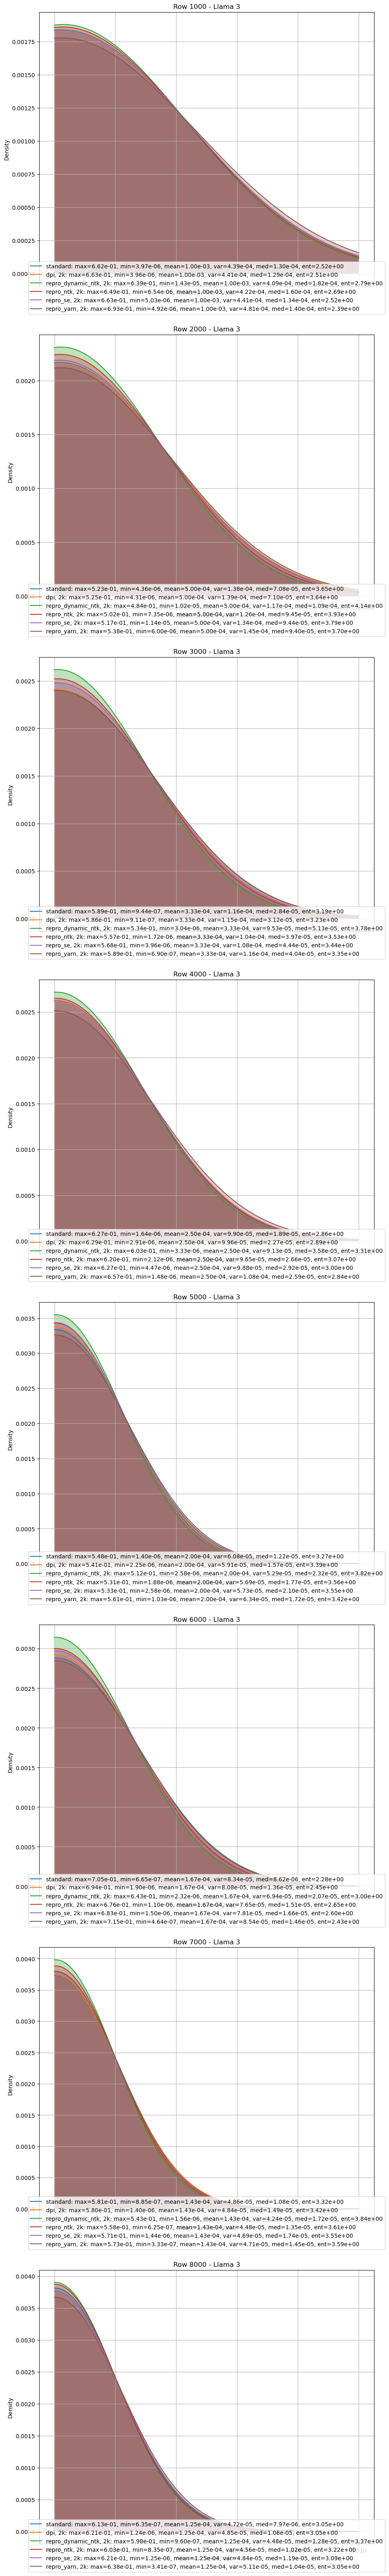

In [91]:
plot_attention_pdfs(all_difs, standard_attn=ori8k, row_indices=[1000,2000,3000,4000, 5000,6000, 7000, 8000], num_points = 1000, bandwidths=[[0.2]*8,[0.3]*8,[0.3]*8,[0.3]*8,[0.3]*8,[0.3]*8,[0.3]*8,[0.3]*8], used_pe="2k",)

In [52]:
from models.DPI.help_funcs import get_chunk_size_list, construct_new_pi_without_importance
chunk_list = get_chunk_size_list(3988, 2048,3000,256)
print(chunk_list)
new_pi = construct_new_pi_without_importance(2048,2048,torch.device('cpu'),[],add_token=1792,local_window=256,start_pos=0)
print(new_pi[:10])
print(new_pi[-10:])

[2048, 1792, 148]
tensor([0.0000, 0.3333, 0.6667, 1.0000, 1.3333, 1.6667, 2.0000, 2.3333, 2.6667,
        3.0000])
tensor([2038., 2039., 2040., 2041., 2042., 2043., 2044., 2045., 2046., 2047.])


## histogram

In [48]:
def plot_attention_histograms(
    attention_combinations,
    legend_titles,
    row_indices,
    bins=30,
    titles=None,
):
    """
    Represent specific rows of attention scores from multiple combinations using histograms.


    Parameters:
    - attention_combinations: list of lists of 2D numpy arrays, each sublist is a combination of attention matrices.
    - legend_titles: list of lists of str, the legend titles for each matrix in each combination.
    - row_indices: list of int, the row indices to visualize for each combination.
    - bins: int, the number of bins for histograms (default: 30).
    - titles: list of str, titles for each combination's subplot (optional).


    Returns:
    - None (plots the histograms).
    """
    num_combinations = len(attention_combinations)
    assert num_combinations > 0, "There must be at least one combination of attention matrices."


    if titles is None:
        titles = [f"Llama {i+2}" for i in range(num_combinations)]


    # Configure subplots
    num_rows = len(row_indices)
    fig, axes = plt.subplots(num_rows, num_combinations, figsize=(10 * num_combinations, num_rows * 6), sharex=True)


    if num_rows == 1:
        axes = [axes]  # Ensure axes is iterable for single-row case


    # Flatten axes for easier indexing
    axes = np.array(axes).reshape(num_rows, num_combinations)


    for r_idx, row_index in enumerate(row_indices):
        for c_idx, combination in enumerate(attention_combinations):
            # Collect all rows for the current combination and row_index
            rows = [np.array(matrix[0][row_index, :row_index].to(torch.float16)) for matrix in combination]
            
            # Get global min and max for bin range
            global_min = min([row.min() for row in rows])
            global_max = max([row.max() for row in rows])
            bin_edges = np.linspace(0, 0.001, bins + 1)


            ax = axes[r_idx, c_idx]


            for matrix_idx, row in enumerate(rows):
                # Normalize row to create probability distribution
                row = row / np.sum(row) if np.sum(row) > 0 else np.zeros_like(row)


                # Plot histogram with offset
                ax.hist(
                    row,
                    bins=bin_edges,
                    alpha=0.7,
                    density=True,
                    label=legend_titles[c_idx][matrix_idx],
                    histtype="stepfilled",  # Use stepfilled for better visual clarity
                )


            # Subplot settings
            ax.set_title(f"Row {row_index} - {titles[c_idx]}")
            ax.set_xlabel("Attention Score Value")
            ax.set_ylabel("Density")
            ax.grid(True)
            ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=1)


    # Adjust layout
    plt.tight_layout()
    plt.show()

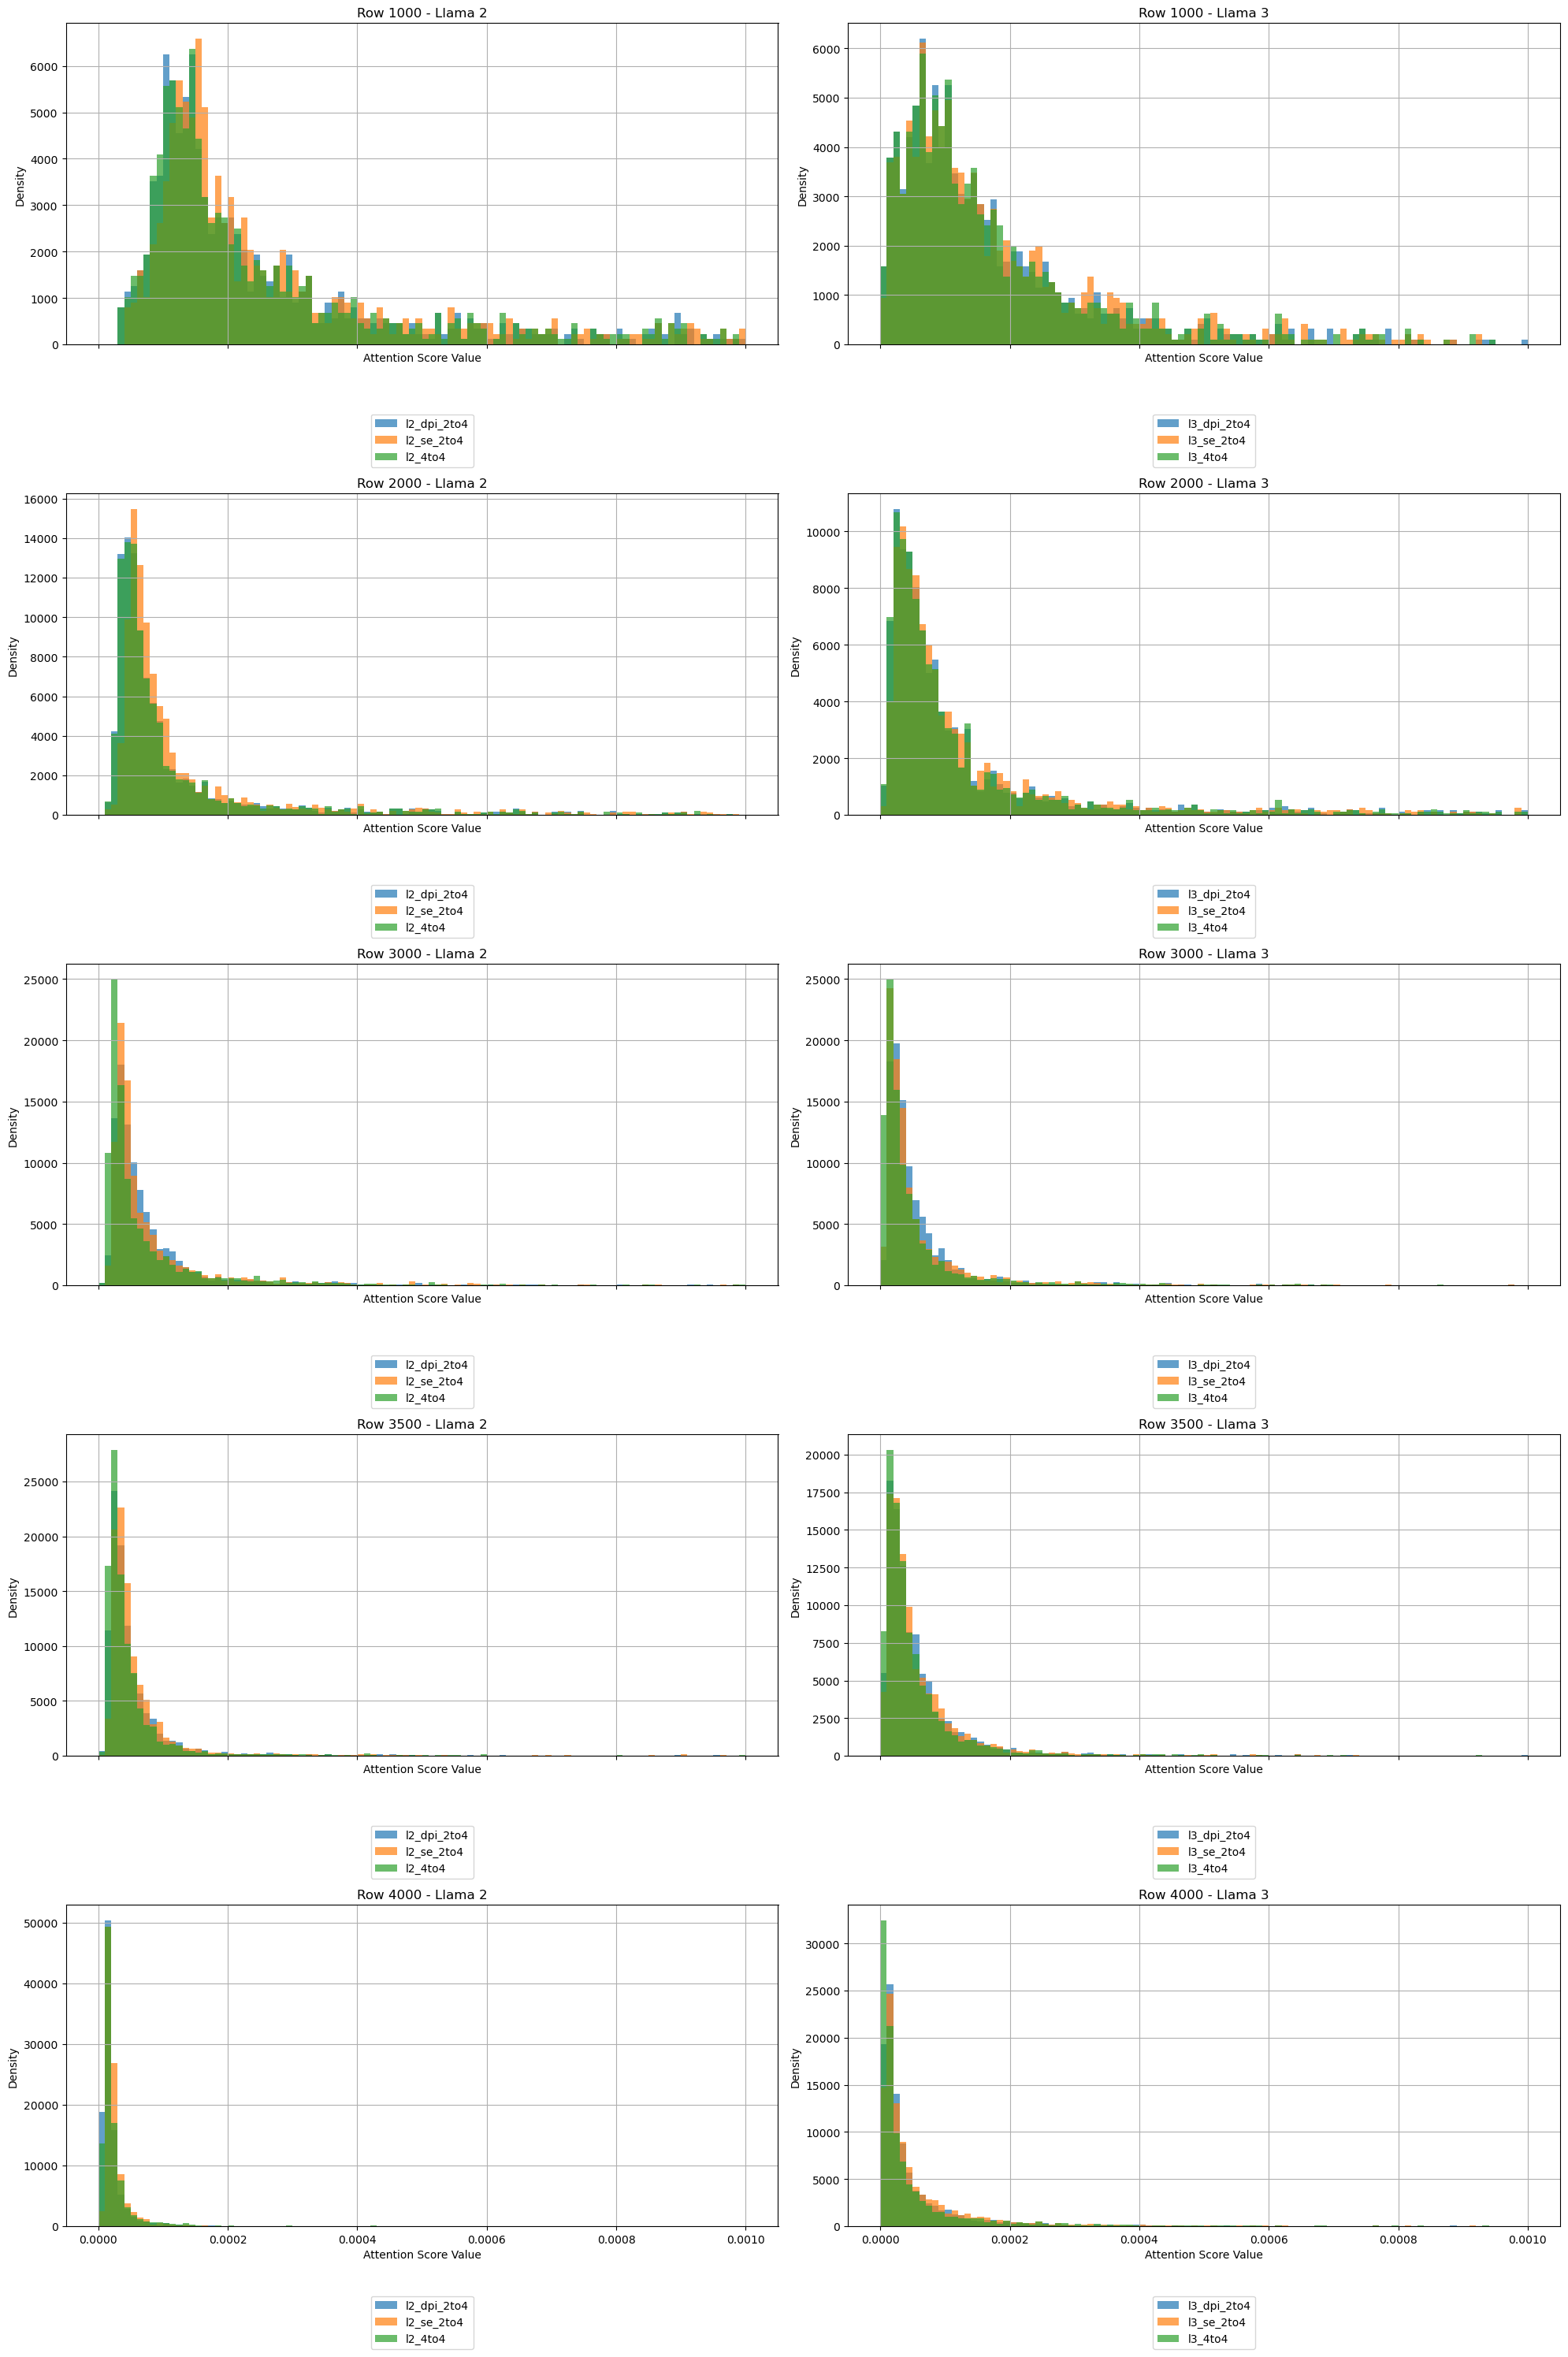

In [49]:
plot_attention_histograms([[l2_dpi_2to4, l2_se_2to4, l2_4to4], [l3_dpi_2to4, l3_se_2to4, l3_4to4]], [['l2_dpi_2to4', 'l2_se_2to4', 'l2_4to4'], ['l3_dpi_2to4', 'l3_se_2to4', 'l3_4to4']], row_indices=[1000,2000,3000,3500, 4000], bins = 100)

# PE example

In [458]:
import math
def construct_new_pi_without_importance(cur_len, max_position_embeddings, device, rec, add_token=1,local_window=0, start_pos = 0):
    # start_pos = 100
    target_len = cur_len + add_token
    min_group_size = math.ceil(target_len/ (max_position_embeddings-local_window - start_pos))
    interval = 1/min_group_size
    ori_len = max_position_embeddings - start_pos
    new_pi = []
    i = start_pos
    while ori_len < target_len:
        new_pi += [i +interval * j for j in range(min_group_size)]
        i += 1
        ori_len = max_position_embeddings - i + len(new_pi)
    seg_1 = [j for j in range(0, start_pos)]
    seg_2 = [j for j in range(i+start_pos, max_position_embeddings)]
    new_pi = seg_1 + new_pi[:target_len - len(seg_1) - len(seg_2)] +  seg_2
    new_pi = torch.tensor(new_pi, device=device)
    rec.append(new_pi)
    print(new_pi)
    return new_pi

In [459]:
construct_new_pi_without_importance(4,4,torch.device('cpu'),[],4,2)

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000, 1.2500, 2.0000, 3.0000])


tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000, 1.2500, 2.0000, 3.0000])

In [460]:
p1 = [0,1,2,3]
rec = [torch.tensor(p1)]
p2 = construct_new_pi_without_importance(4,4,torch.device('cpu'),rec,4,2)
p3 = construct_new_pi_without_importance(8,4,torch.device('cpu'),rec,2,2)

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000, 1.2500, 2.0000, 3.0000])
tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 1.2000, 1.4000, 2.0000,
        3.0000])


In [ ]:
rec

In [461]:
rec[0] = torch.tensor([0,1,2,3,0,0,0,0,0,0])
rec[1] = torch.tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000, 1.2500, 2.0000, 3.0000,0,0])

In [462]:
d0 = rec[0].unsqueeze(1).float() - rec[0].unsqueeze(0).float()
d1 = rec[1].unsqueeze(1).float() - rec[1].unsqueeze(0).float()
d2 = rec[2].unsqueeze(1).float() - rec[2].unsqueeze(0).float()

In [463]:
d0[4:8,:] = d1[4:8,:]
d0[8:10] = d2[8:10,:]

In [464]:
torch.set_printoptions(linewidth=100,precision=2) 
df = d0 - torch.triu(d0)
print(df)

tensor([[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [3.00, 2.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 0.75, 0.50, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.25, 1.00, 0.75, 0.50, 0.25, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.00, 1.75, 1.50, 1.25, 1.00, 0.75, 0.00, 0.00, 0.00, 0.00],
        [3.00, 2.75, 2.50, 2.25, 2.00, 1.75, 1.00, 0.00, 0.00, 0.00],
        [2.00, 1.80, 1.60, 1.40, 1.20, 1.00, 0.80, 0.60, 0.00, 0.00],
        [3.00, 2.80, 2.60, 2.40, 2.20, 2.00, 1.80, 1.60, 1.00, 0.00]])
